In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
# Read in the cleaned earthquake data
df = pd.read_csv('./clean_quakes.csv')
df.shape

(114498, 32)

In [3]:
df.head()

,id,lat,long,depth,alert,cdi,code,detail,dmin,felt,...,time,title,tsunami,type,types,tz,updated,url,magDecade,year
0,nc1022389,-121.873500,36.593000,4.946,0.0,NaN,1022389,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.03694,NaN,...,1974-12-30 13:28:16.830,M 3.4 - Central California,False,earthquake,"focal-mechanism,nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:44.940,https://earthquake.usgs.gov/earthquakes/eventp...,3,1974
1,nc1022388,-121.464500,36.929000,3.946,0.0,NaN,1022388,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.04144,NaN,...,1974-12-30 09:46:54.820,M 3.0 - Central California,False,earthquake,"nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:33.974,https://earthquake.usgs.gov/earthquakes/eventp...,2,1974
2,ci3319041,-116.128833,29.907667,6.000,0.0,NaN,3319041,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.73400,NaN,...,1974-12-30 08:12:47.870,"M 4.6 - 206km SSE of Maneadero, B.C., MX",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:48:03.640,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
3,usp00009ad,-116.402000,30.424000,33.000,0.0,NaN,p00009ad,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,1974-12-30 08:12:15.300,"M 4.0 - offshore Baja California, Mexico",False,earthquake,origin,NaN,2014-11-06 18:21:28.071,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
4,usp000099y,-116.185000,30.757000,33.000,0.0,NaN,p000099y,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,1974-12-29 07:07:01.500,"M 4.2 - offshore Baja California, Mexico",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:18:24.990,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974


In [4]:
# Oops, the latitude and longitude are swapped, need to fix the column headers to match data.

df.rename(columns={'lat': 'newlong', \
                        'long': 'newlat'}, inplace=True)

In [5]:
df.rename(columns={'newlong': 'long', \
                        'newlat': 'lat'}, inplace=True)

In [6]:
df.head()

,id,long,lat,depth,alert,cdi,code,detail,dmin,felt,...,time,title,tsunami,type,types,tz,updated,url,magDecade,year
0,nc1022389,-121.873500,36.593000,4.946,0.0,NaN,1022389,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.03694,NaN,...,1974-12-30 13:28:16.830,M 3.4 - Central California,False,earthquake,"focal-mechanism,nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:44.940,https://earthquake.usgs.gov/earthquakes/eventp...,3,1974
1,nc1022388,-121.464500,36.929000,3.946,0.0,NaN,1022388,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.04144,NaN,...,1974-12-30 09:46:54.820,M 3.0 - Central California,False,earthquake,"nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:33.974,https://earthquake.usgs.gov/earthquakes/eventp...,2,1974
2,ci3319041,-116.128833,29.907667,6.000,0.0,NaN,3319041,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.73400,NaN,...,1974-12-30 08:12:47.870,"M 4.6 - 206km SSE of Maneadero, B.C., MX",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:48:03.640,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
3,usp00009ad,-116.402000,30.424000,33.000,0.0,NaN,p00009ad,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,1974-12-30 08:12:15.300,"M 4.0 - offshore Baja California, Mexico",False,earthquake,origin,NaN,2014-11-06 18:21:28.071,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
4,usp000099y,-116.185000,30.757000,33.000,0.0,NaN,p000099y,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,1974-12-29 07:07:01.500,"M 4.2 - offshore Baja California, Mexico",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:18:24.990,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974


In [7]:
# dfm = df[df['mmi'].notnull()][['id','lat', 'long', 'depth', 'mag', 'mmi', 'cdi', 'alert', \
#                               'felt', 'time', 'magDecade', 'year']]

dfm = df[df['mmi'].notnull()][['id','lat', 'long', 'depth', 'mag', 'mmi', 'cdi', 'alert', \
                              'felt', 'time', 'net', 'type',  'gap', 'magDecade', 'year']]

In [8]:
dfm.shape

(2955, 15)

In [9]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2955 entries, 1148 to 114485
Data columns (total 15 columns):
id           2955 non-null object
lat          2955 non-null float64
long         2955 non-null float64
depth        2955 non-null float64
mag          2955 non-null float64
mmi          2955 non-null float64
cdi          2107 non-null float64
alert        2955 non-null float64
felt         2107 non-null float64
time         2955 non-null object
net          2955 non-null object
type         2955 non-null object
gap          2744 non-null float64
magDecade    2955 non-null int64
year         2955 non-null int64
dtypes: float64(9), int64(2), object(4)
memory usage: 369.4+ KB


In [10]:
dfm = dfm.dropna()

In [11]:
dfm.shape

(2009, 15)

In [19]:
dfm[dfm['cdi'].notnull()].shape

(2009, 15)

In [20]:
dfm[dfm['felt'] >= 5].shape

(1606, 15)

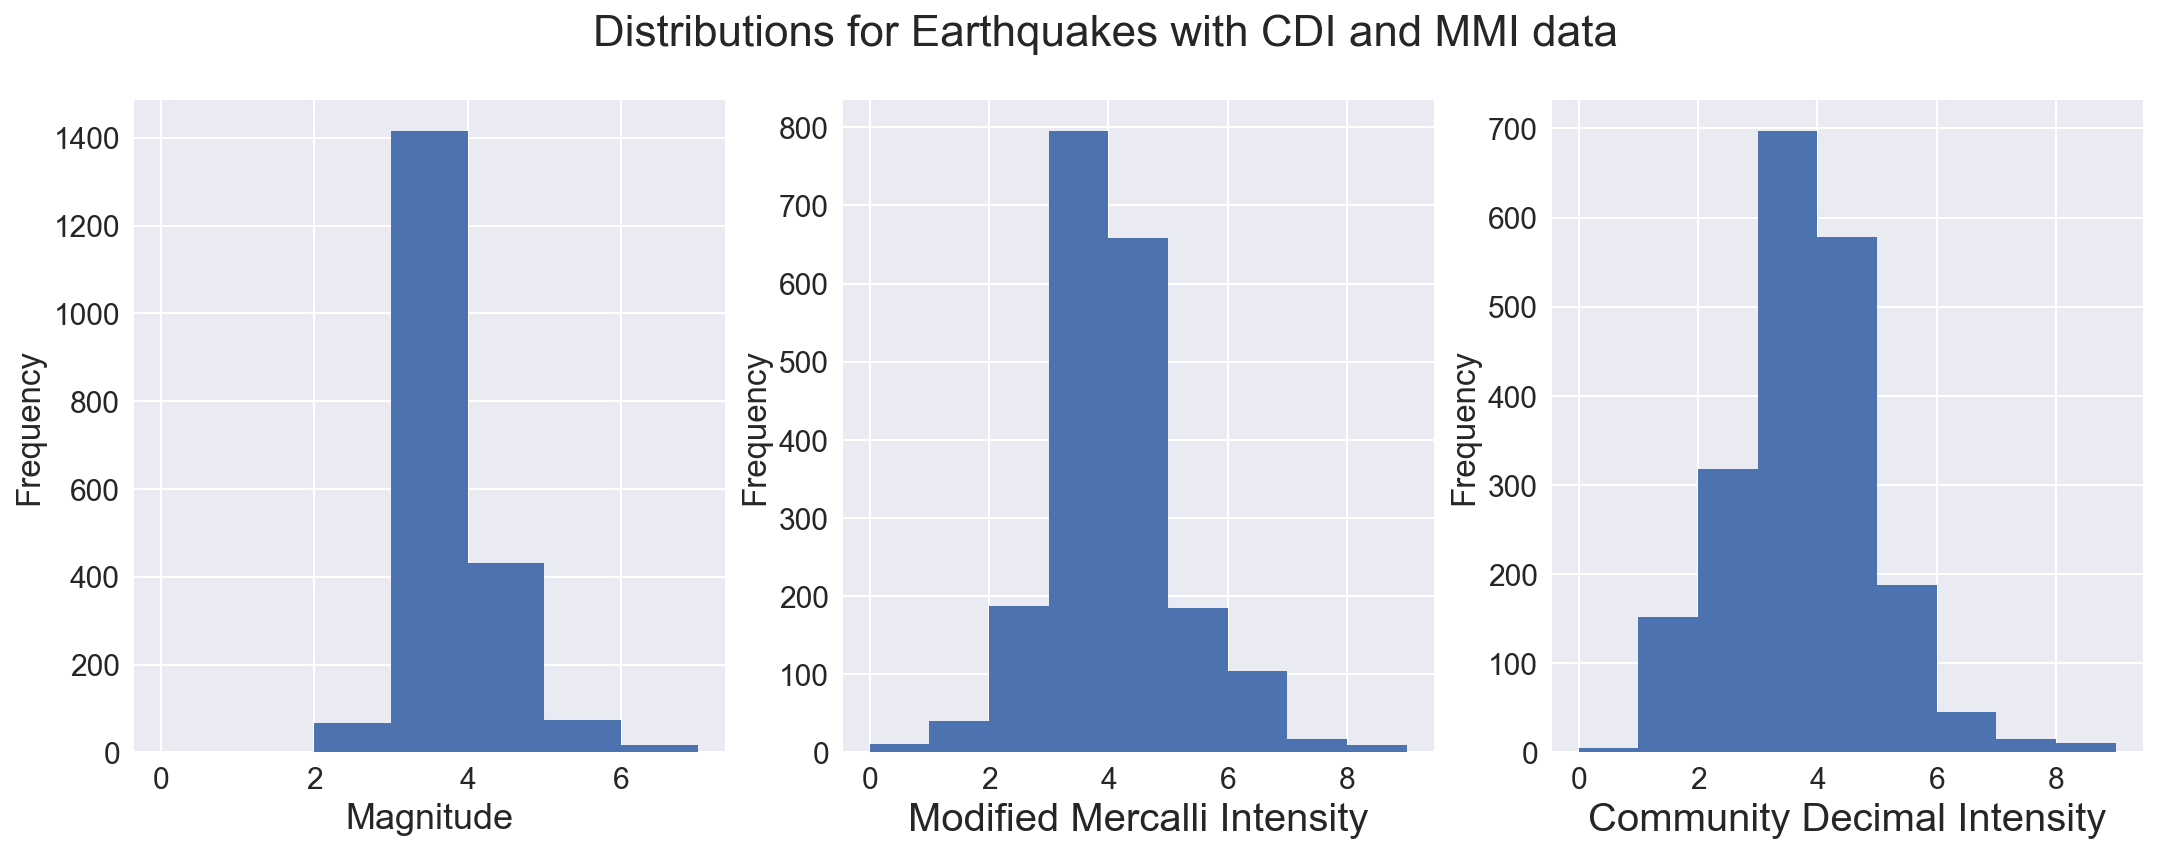

In [16]:
sns.set(font_scale=1.5)
fig, axs = plt.subplots(ncols=3, figsize=(18,6))
fig.suptitle("Distributions for Earthquakes with CDI and MMI data", fontsize=22)

dfm['mag'].plot(kind='hist', bins=7, range=(0,7), ax=axs[0])
dfm['mmi'].plot(kind='hist', bins=9, range=(0,9), ax=axs[1])
dfm['cdi'].plot(kind='hist', bins=9, range=(0,9), ax=axs[2])
axs[0].set_xlabel('Magnitude', fontsize=18)
axs[1].set_xlabel('Modified Mercalli Intensity', fontsize=20)
axs[2].set_xlabel('Community Decimal Intensity', fontsize=20)
axs[0].locator_params(numticks=9)


In [12]:
# bootstrap with filter to obtain samples more equally distributed across earthquake magnitude

from random import random

dfmw = pd.DataFrame()

idx=0
while (len(dfmw) < len(dfm)) and (idx<=20000):
           
    prn = random()
#     sample = pd.DataFrame(dfm.iloc[idx]).T
    sample = dfm.iloc[idx]
   
    if sample['mag'].item() <= 3:
        weight = 0.75
    elif sample['mag'].item() <= 4:
        weight = 0.95
    elif sample['mag'].item() <= 5:
        weight = 0.9
    elif sample['mag'].item() <= 6:
        weight = 0.1
    else:
        weight = 0
        
    if prn >= weight:
        dfmw = dfmw.append(sample, ignore_index=True)
        
    idx += 1    
    if idx == len(dfm):
        idx = 0
    
dfmw.shape




(2009, 15)

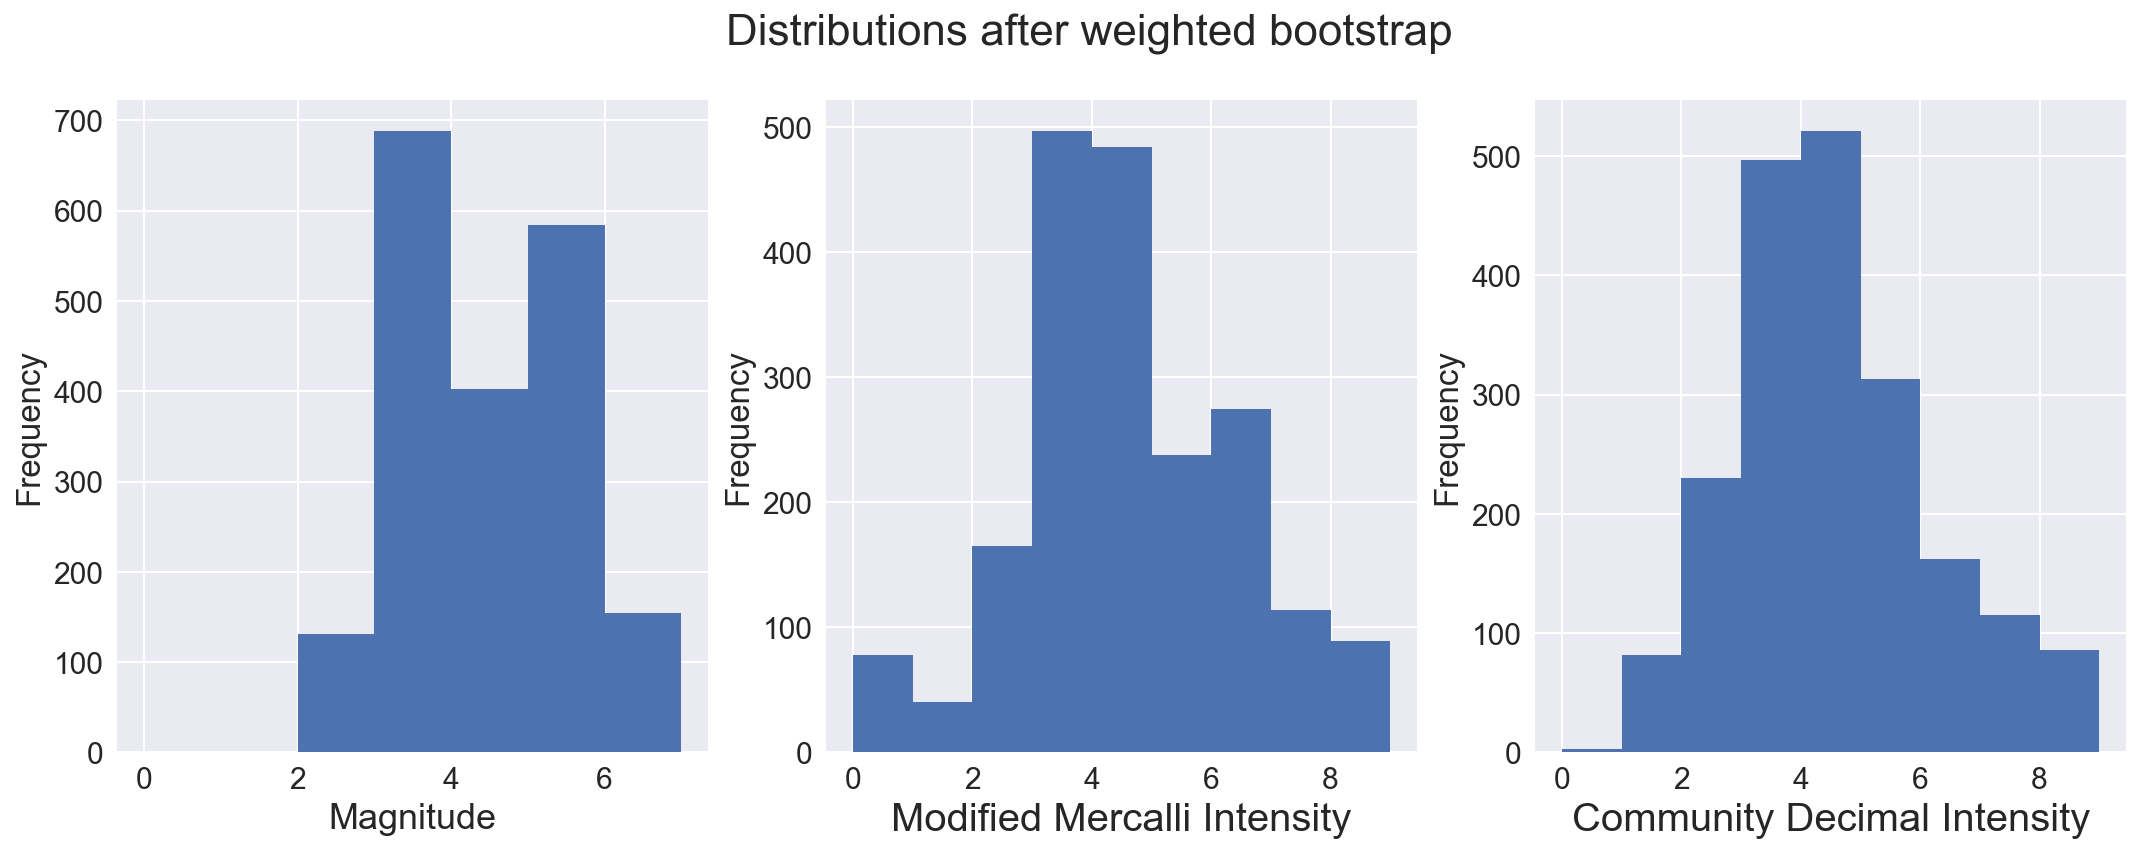

In [15]:
sns.set(font_scale=1.5)
fig, axs = plt.subplots(ncols=3, figsize=(18,6))
fig.suptitle("Distributions after weighted bootstrap", fontsize=22)

dfmw['mag'].plot(kind='hist', bins=7, range=(0,7), ax=axs[0])
dfmw['mmi'].plot(kind='hist', bins=9, range=(0,9), ax=axs[1])
dfmw['cdi'].plot(kind='hist', bins=9, range=(0,9), ax=axs[2])
axs[0].set_xlabel('Magnitude', fontsize=18)
axs[1].set_xlabel('Modified Mercalli Intensity', fontsize=20)
axs[2].set_xlabel('Community Decimal Intensity', fontsize=20)
axs[0].locator_params(numticks=9)


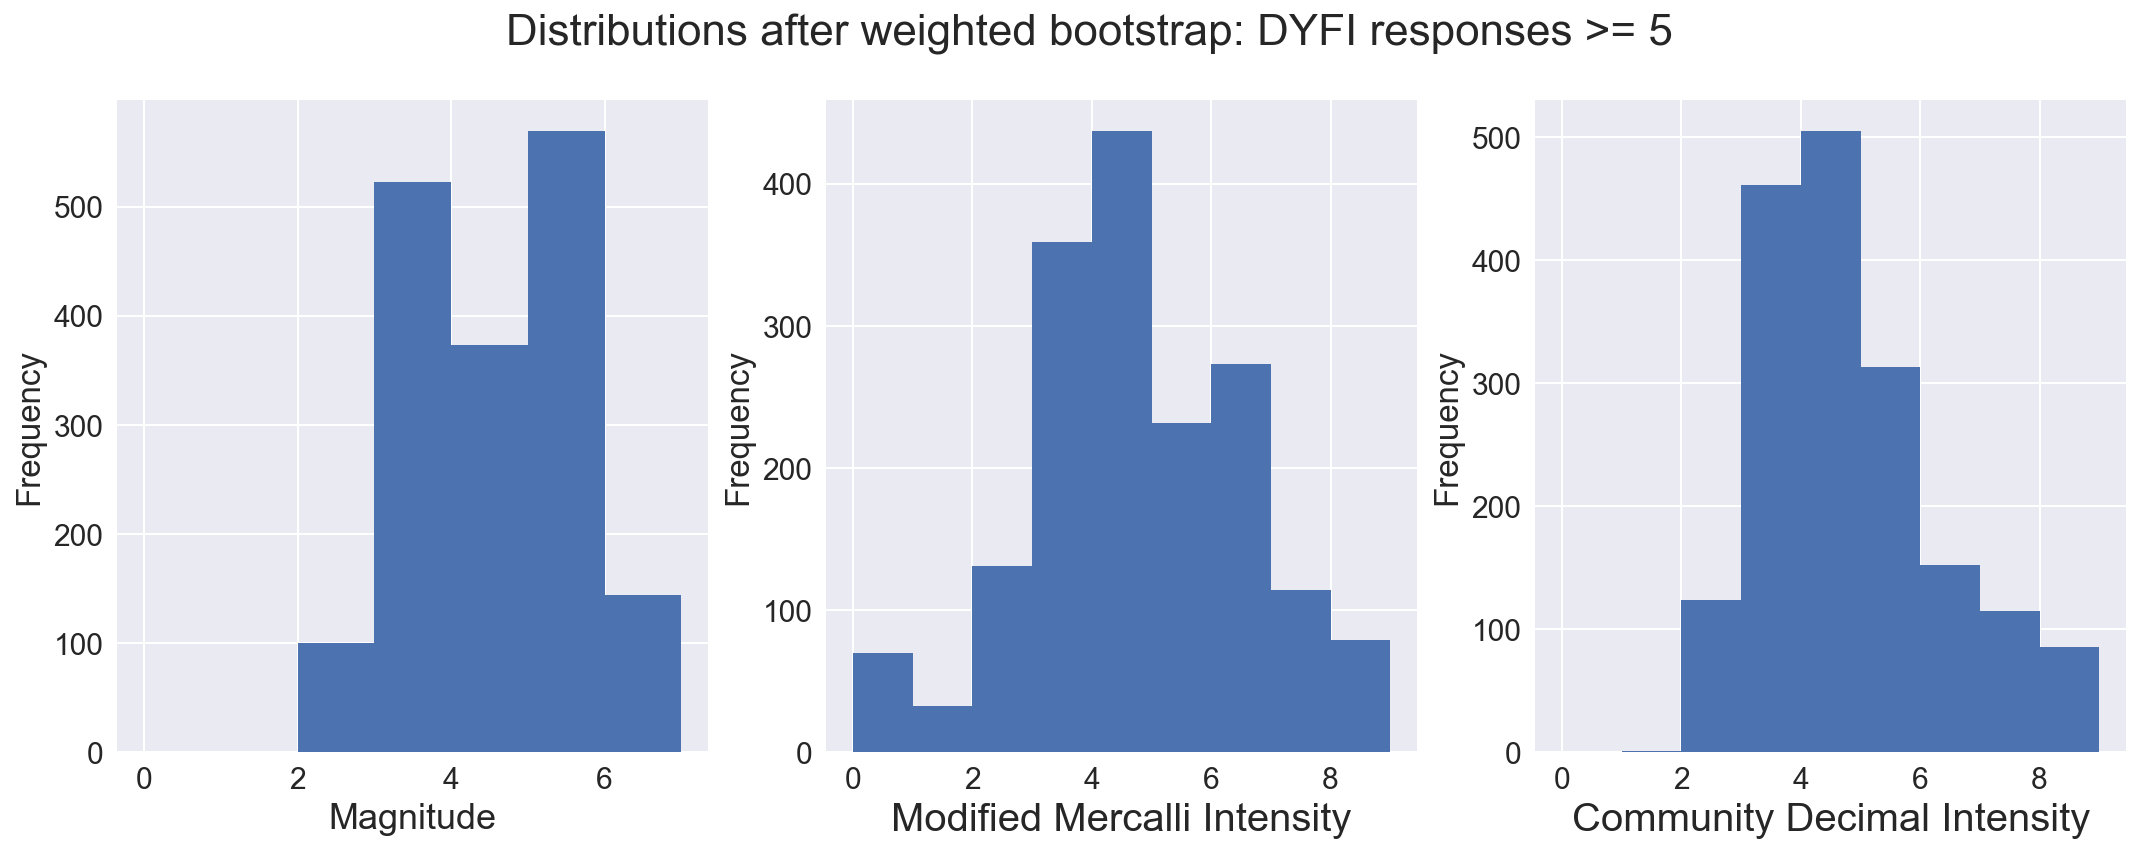

In [21]:
sns.set(font_scale=1.5)
fig, axs = plt.subplots(ncols=3, figsize=(18,6))
fig.suptitle("Distributions after weighted bootstrap: DYFI responses >= 5", fontsize=22)

dfmw[dfmw['felt'] >= 5]['mag'].plot(kind='hist', bins=7, range=(0,7), ax=axs[0])
dfmw[dfmw['felt'] >= 5]['mmi'].plot(kind='hist', bins=9, range=(0,9), ax=axs[1])
dfmw[dfmw['felt'] >= 5]['cdi'].plot(kind='hist', bins=9, range=(0,9), ax=axs[2])
axs[0].set_xlabel('Magnitude', fontsize=18)
axs[1].set_xlabel('Modified Mercalli Intensity', fontsize=20)
axs[2].set_xlabel('Community Decimal Intensity', fontsize=20)
axs[0].locator_params(numticks=9)


In [22]:
dfmw.head()

,alert,cdi,depth,felt,gap,id,lat,long,mag,magDecade,mmi,net,time,type,year
0,0.0,8.9,8.950,1141.0,123.4,ci3347678,34.416000,-118.370000,6.6,6.0,8.6,ci,1971-02-09 09:00:41.920,earthquake,1971.0
1,0.0,8.3,15.000,75.0,168.0,ci3352060,32.667333,-115.359167,6.4,6.0,9.5,ci,1979-10-15 19:16:53.910,earthquake,1979.0
2,0.0,8.4,9.578,73.0,137.0,nc1091100,36.231667,-120.312000,6.7,6.0,8.3,nc,1983-05-02 19:42:38.060,earthquake,1983.0
3,0.0,6.8,17.214,2.0,89.0,nc216859,37.036167,-121.879833,6.9,6.0,8.6,nc,1989-10-17 20:04:15.190,earthquake,1989.0
4,0.0,8.6,8.881,859.0,44.4,ci731691,34.061000,-118.079000,5.9,5.0,7.5,ci,1987-10-01 10:42:20.020,earthquake,1987.0


In [23]:
def set_color(magbin):
    if magbin == 2:
        color = "0000FF"
    elif magbin == 3:
        color = "007FDD"
    elif magbin == 4:
        color = "008E7F"
    elif magbin == 5:
        color = "80E100"        
    elif magbin == 6:
        color = "FFFF00"
    elif magbin == 7:
        color = "FFA000"
    elif magbin == 8:
        color = "FF5A00"
    else: 
        color = "FF0000"  
    
    return color

In [24]:
dfmw['color'] = dfmw['magDecade'].map(lambda x: set_color(x))

In [25]:
# sns.color_palette(palette=['#007FDD', '#008E7F', '#80E100,' '#FFFF00', '#FFA000', '#FF5A00'], n_colors=6, desat=None)

quake_colors = ['#007FDD',  # Q2
                    '#008E7F',  # Q3
                    '#80E100',  # Q4
                    '#FFFF00',  # Q5
                    '#FFA000',  # Q6
                    '#FF5A00',  # Q7
                   ]

quake_colors2 = ['#007FDD',  # Q2 or Q3
                 '#FF5A00',  # Q6 or Q7
                   ]


In [26]:
dfmw_plot1 = dfmw[(dfmw['felt']>=5) & (dfmw['mmi'] != 0)][['mmi', 'cdi', 'felt', 'magDecade']].copy()
dfmw_plot1['          magSize'] = dfmw_plot1['magDecade'].map(lambda x: 0 if x <= 3 else 1 if x >= 6 else np.nan)
dfmw_plot1.columns = ['Modified Mercalli Intensity', 'Community Decimal Intensity', 'felt', 'magDecade', '          magSize' ]


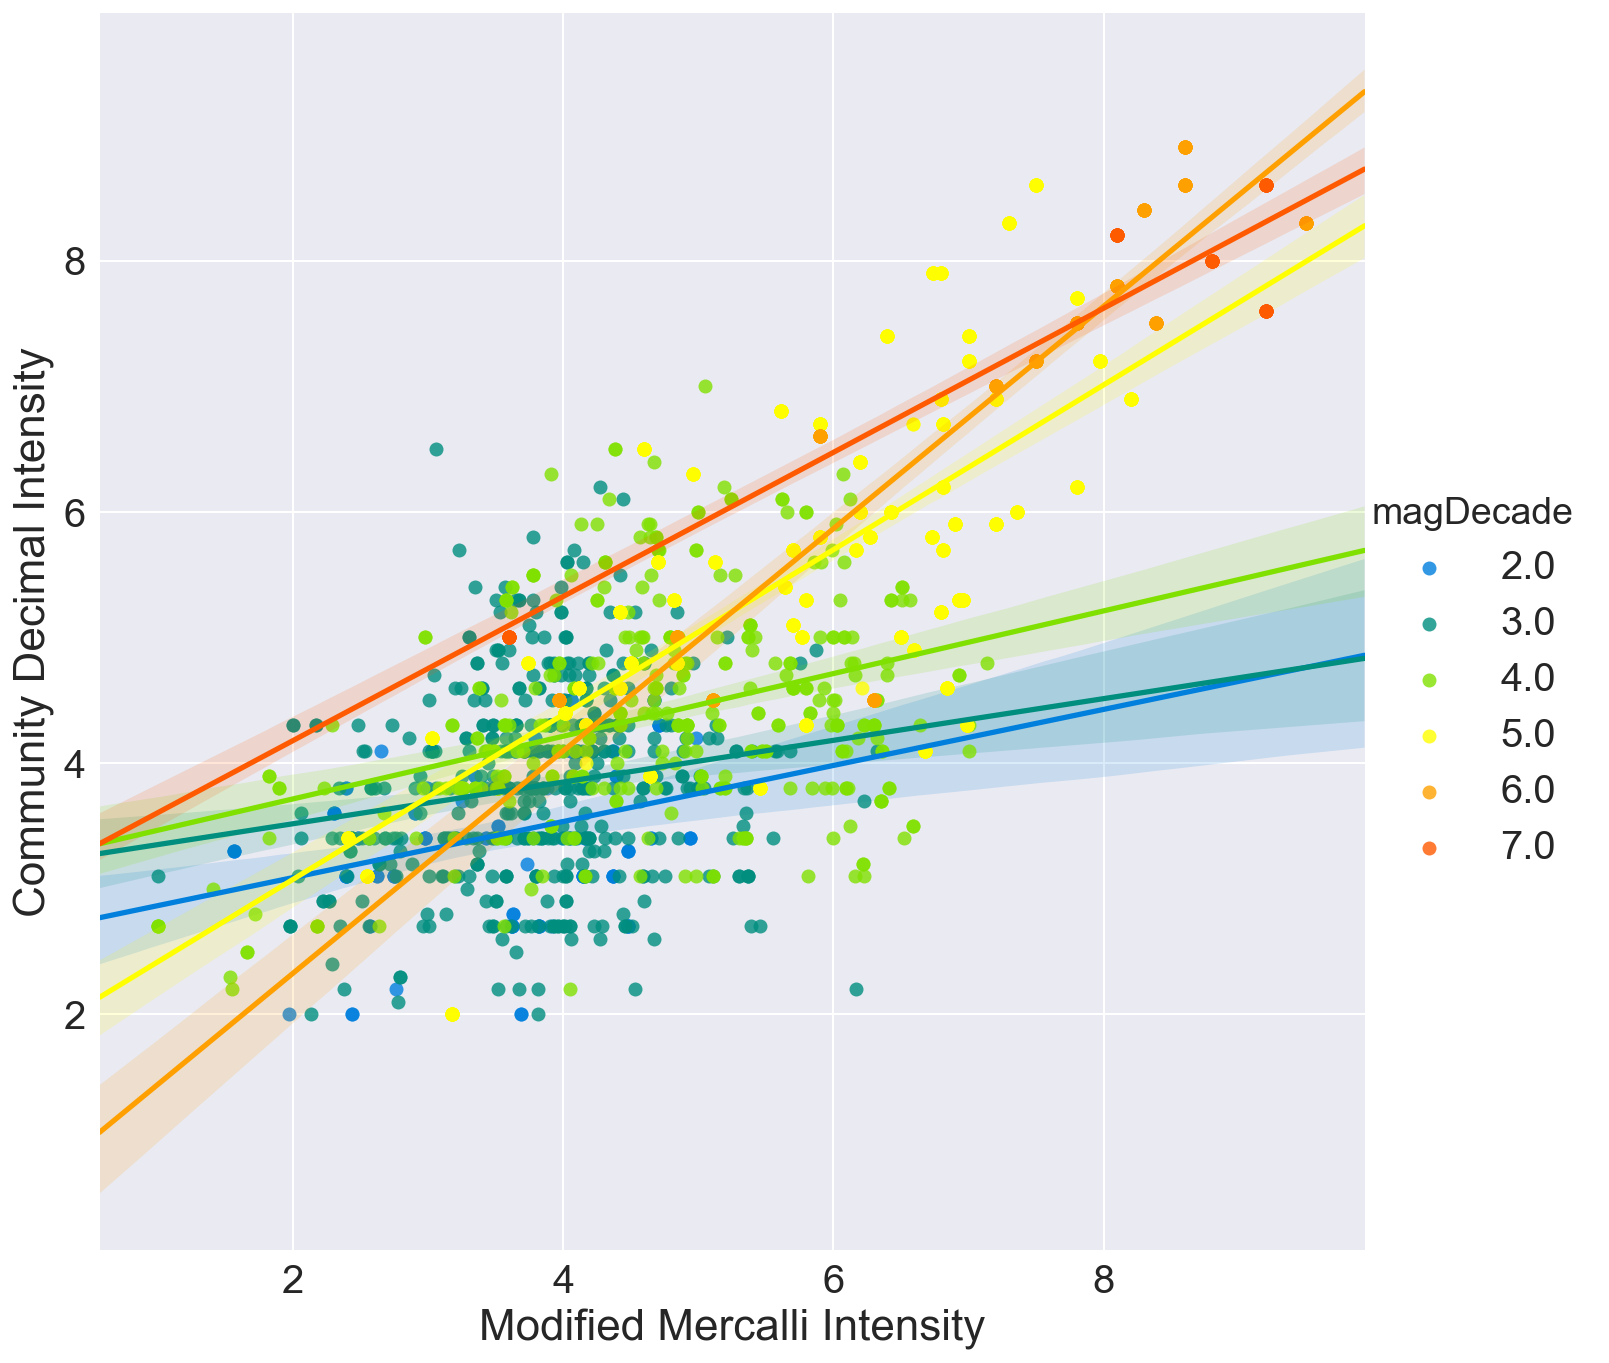

In [371]:
# fig, ax = plt.subplots(figsize=(8,5))
sns.set(font_scale=2)
sns.lmplot('Modified Mercalli Intensity', 'Community Decimal Intensity', \
           data=dfmw_plot1[(dfmw_plot1['felt']>=5)], \
           hue='magDecade', palette=quake_colors, size=10, aspect=1)

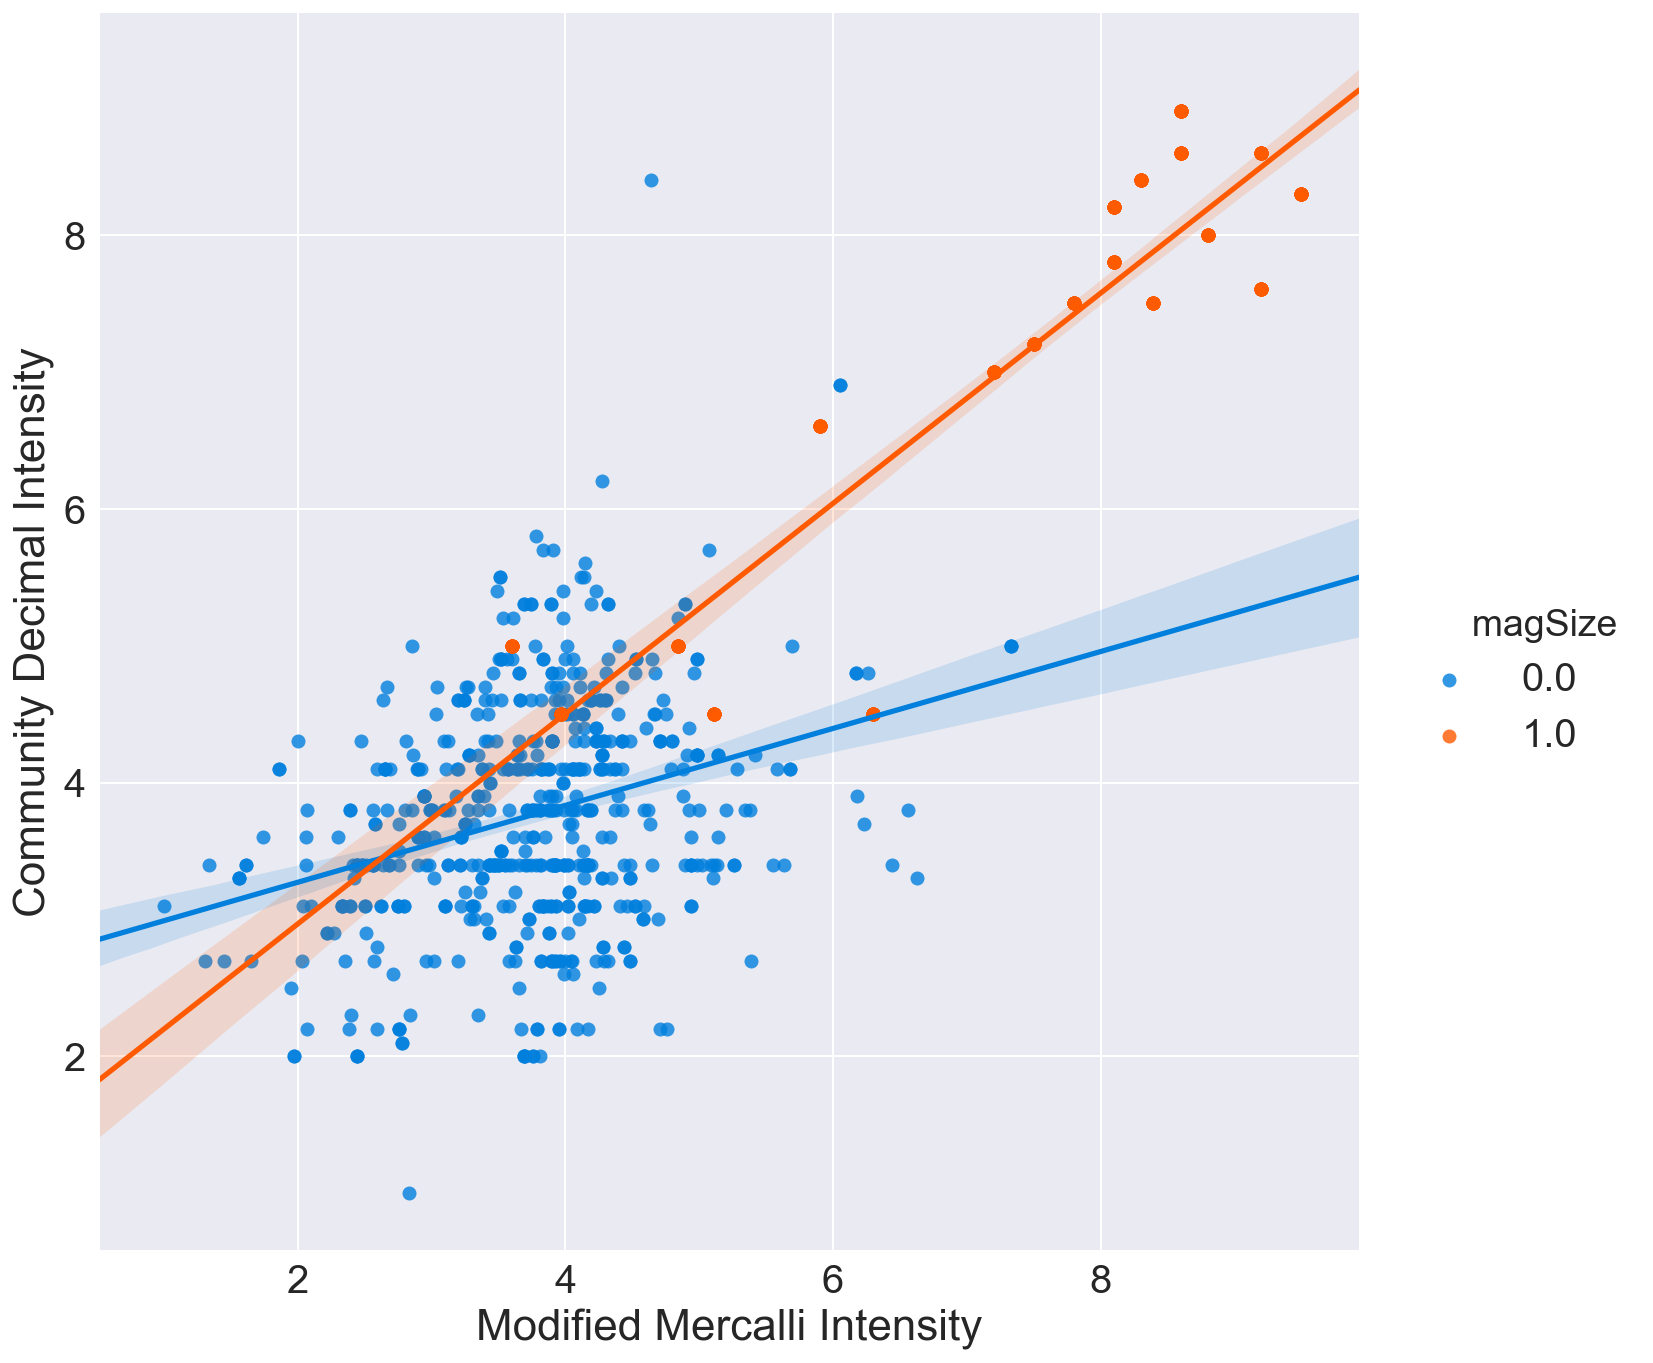

In [28]:

sns.set(font_scale=2)
sns.lmplot('Modified Mercalli Intensity', 'Community Decimal Intensity', \
           data=dfmw_plot1[(dfmw_plot1['felt']>=5) & (dfmw_plot1['          magSize'].notnull())], \
           hue='          magSize', palette=quake_colors2, size=10, aspect=1)

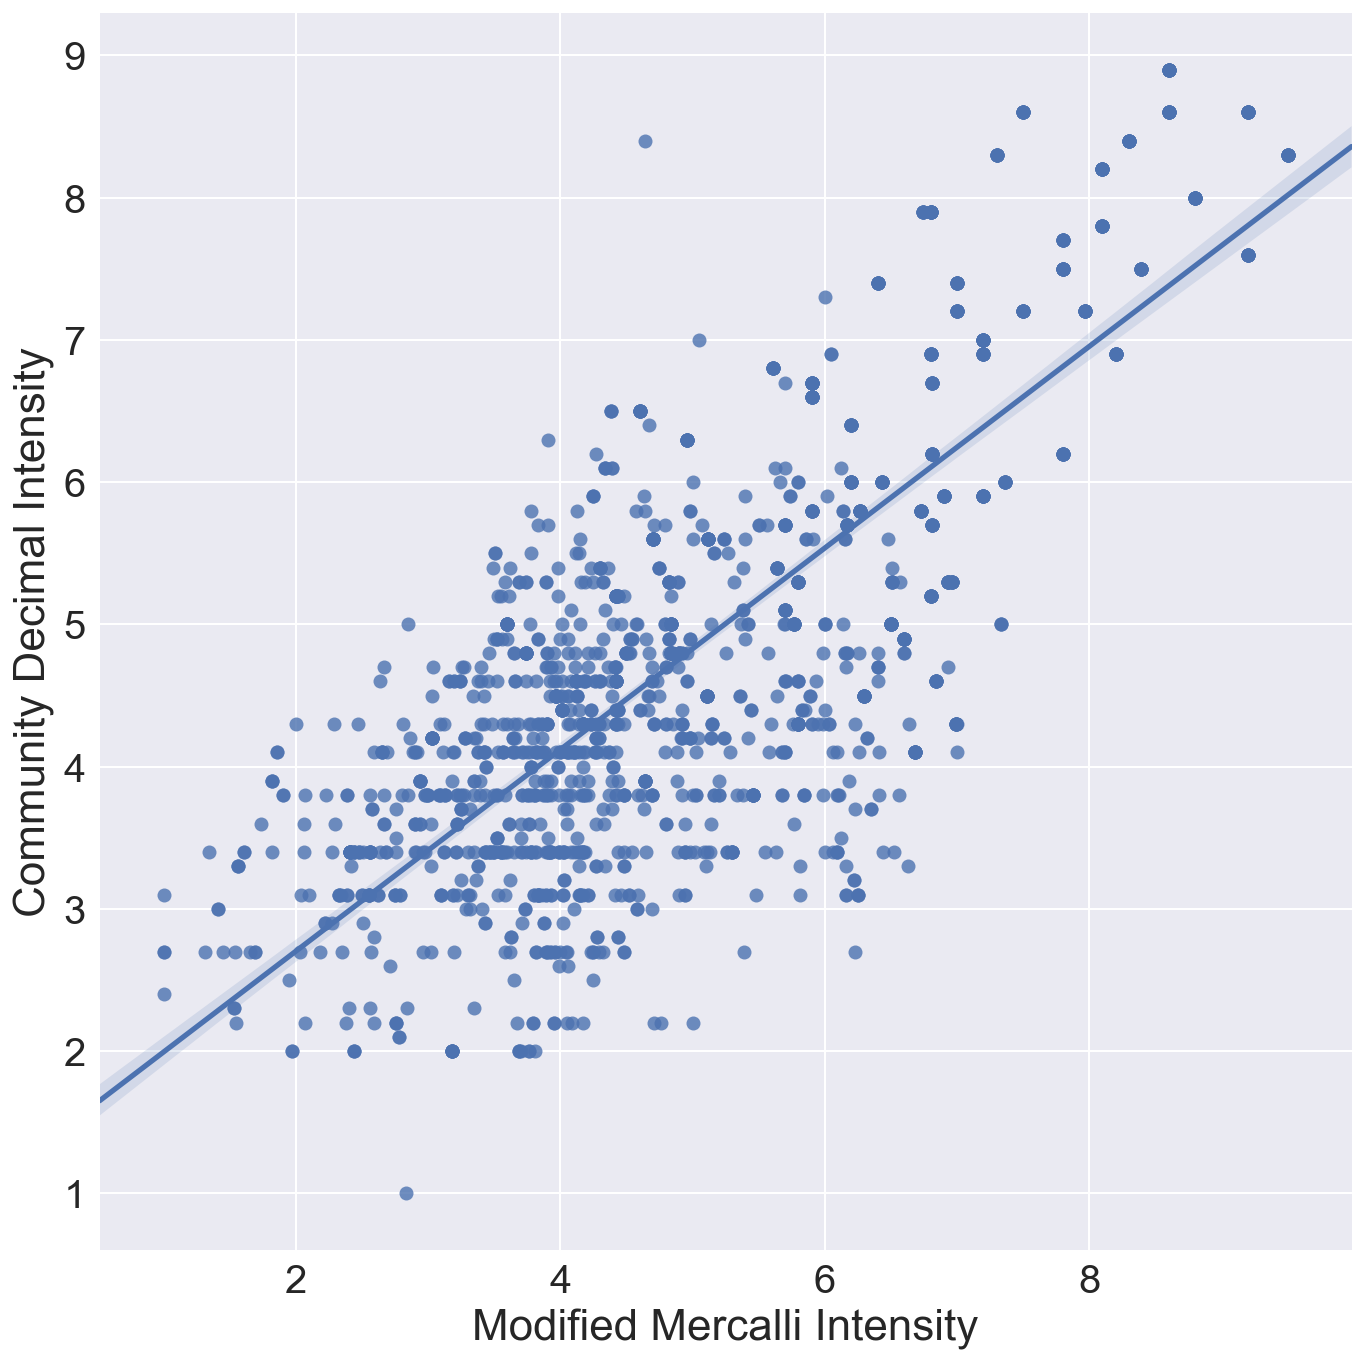

In [29]:
sns.set(font_scale=2)
sns.lmplot('Modified Mercalli Intensity', 'Community Decimal Intensity', \
           data=dfmw_plot1[(dfmw_plot1['felt']>=5)], \
           size=10, aspect=1)

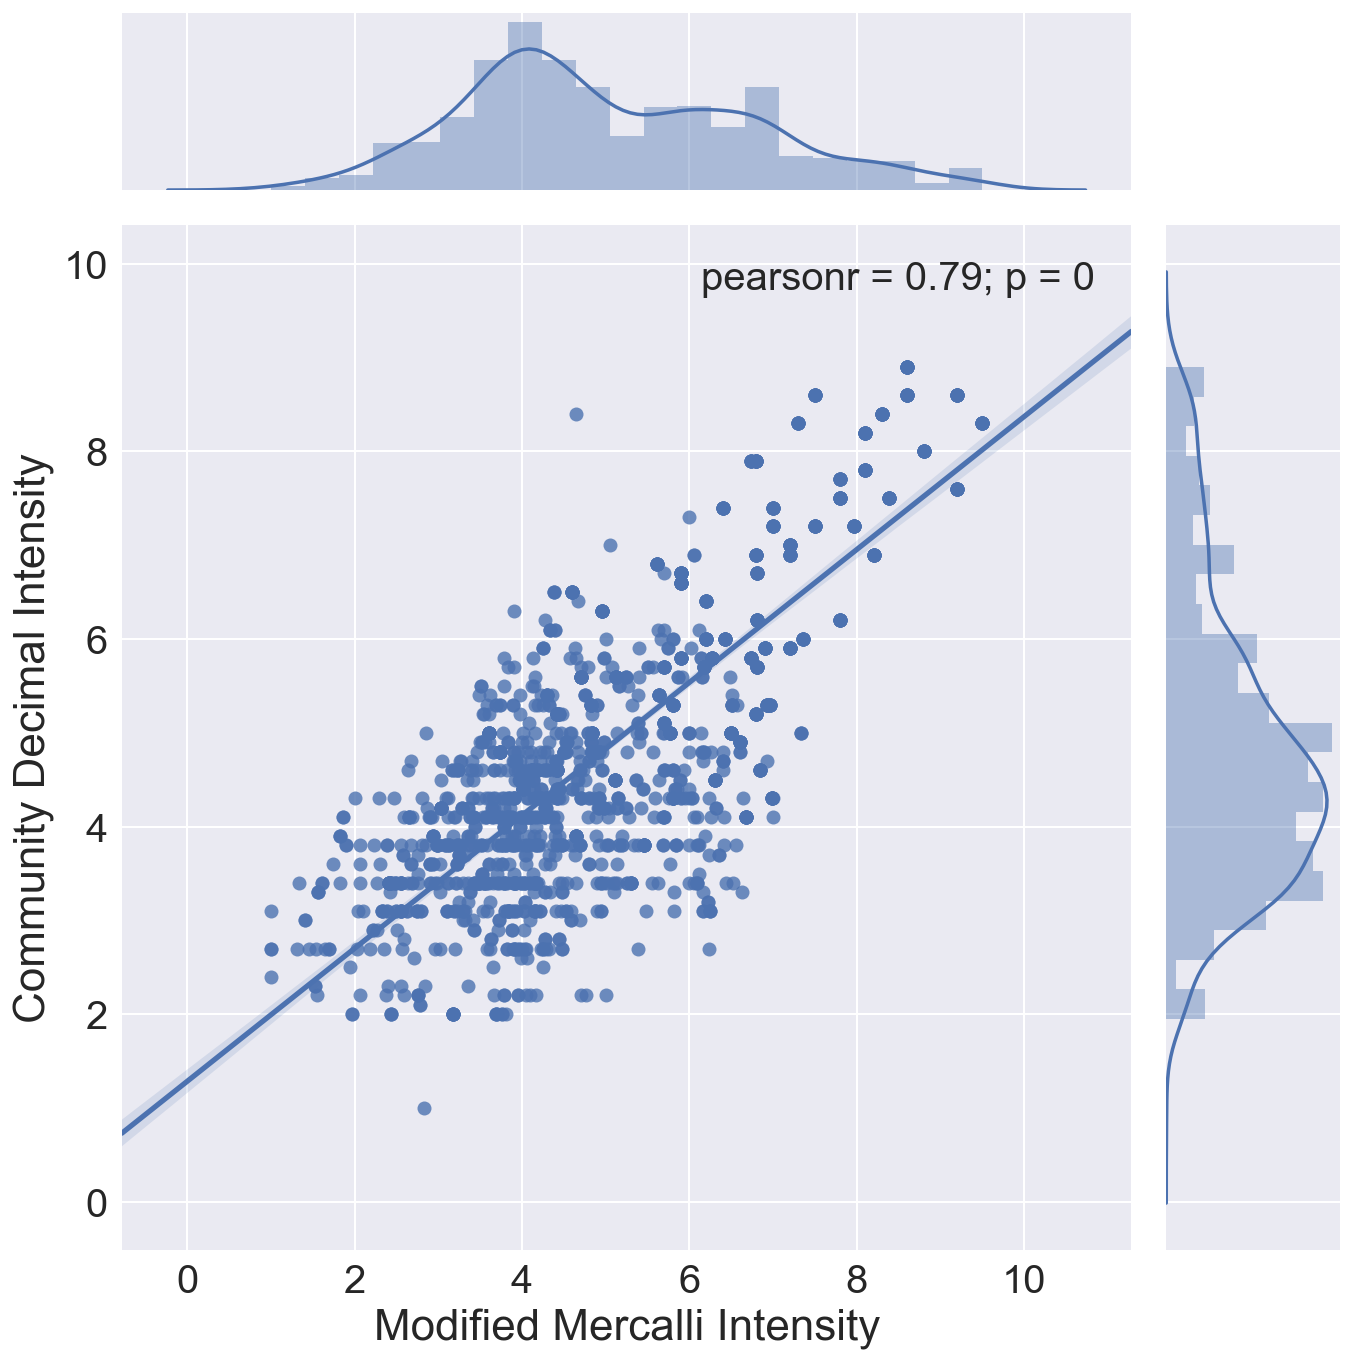

In [31]:
sns.set(font_scale=2)
sns.jointplot('Modified Mercalli Intensity', 'Community Decimal Intensity', \
           data=dfmw_plot1[(dfmw_plot1['felt']>=5)], \
           kind = "reg", size=10)

In [33]:
# Feature Engineering 
dfmw['mmi-cdi_difference'] = dfmw['mmi'] - dfmw['cdi']
dfmw['mmi_round'] = dfmw['mmi'].round(0)
dfmw['cdi_round'] = dfmw['cdi'].round(0)
dfmw['diff_rounded'] = dfmw['mmi_round'] - dfmw['cdi_round']
dfmw['EW'] = dfmw['long'].map(lambda x: 'East' if x > -90 else 'Mid' if x > -105 else 'West')

dfmw['cdi_round'] = dfmw['cdi_round'].map(lambda x: int(x))
dfmw['mmi_round'] = dfmw['mmi_round'].map(lambda x: int(x))
dfmw['diff_rounded'] = dfmw['mmi_round'] - dfmw['cdi_round']

In [34]:
dfmw[['mag', 'mmi', 'cdi', 'felt', 'mmi_round', 'cdi_round', 'diff_rounded', 'mmi-cdi_difference' ]].head()

,mag,mmi,cdi,felt,mmi_round,cdi_round,diff_rounded,mmi-cdi_difference
0,6.6,8.6,8.9,1141.0,9,9,0,-0.3
1,6.4,9.5,8.3,75.0,10,8,2,1.2
2,6.7,8.3,8.4,73.0,8,8,0,-0.1
3,6.9,8.6,6.8,2.0,9,7,2,1.8
4,5.9,7.5,8.6,859.0,8,9,-1,-1.1


In [35]:
print dfmw['mmi-cdi_difference'].mean(), dfmw['mmi-cdi_difference'].std()

0.206217023395 1.34331757832


In [155]:
# dfmw['EW'].value_counts()

In [36]:
# Dummy the country regional indicator to separate eastern, central and western quakes
dfmw = pd.get_dummies(dfmw, columns=['EW'], prefix='Z', prefix_sep='_')
dfmw = dfmw.drop('Z_Mid', 1)


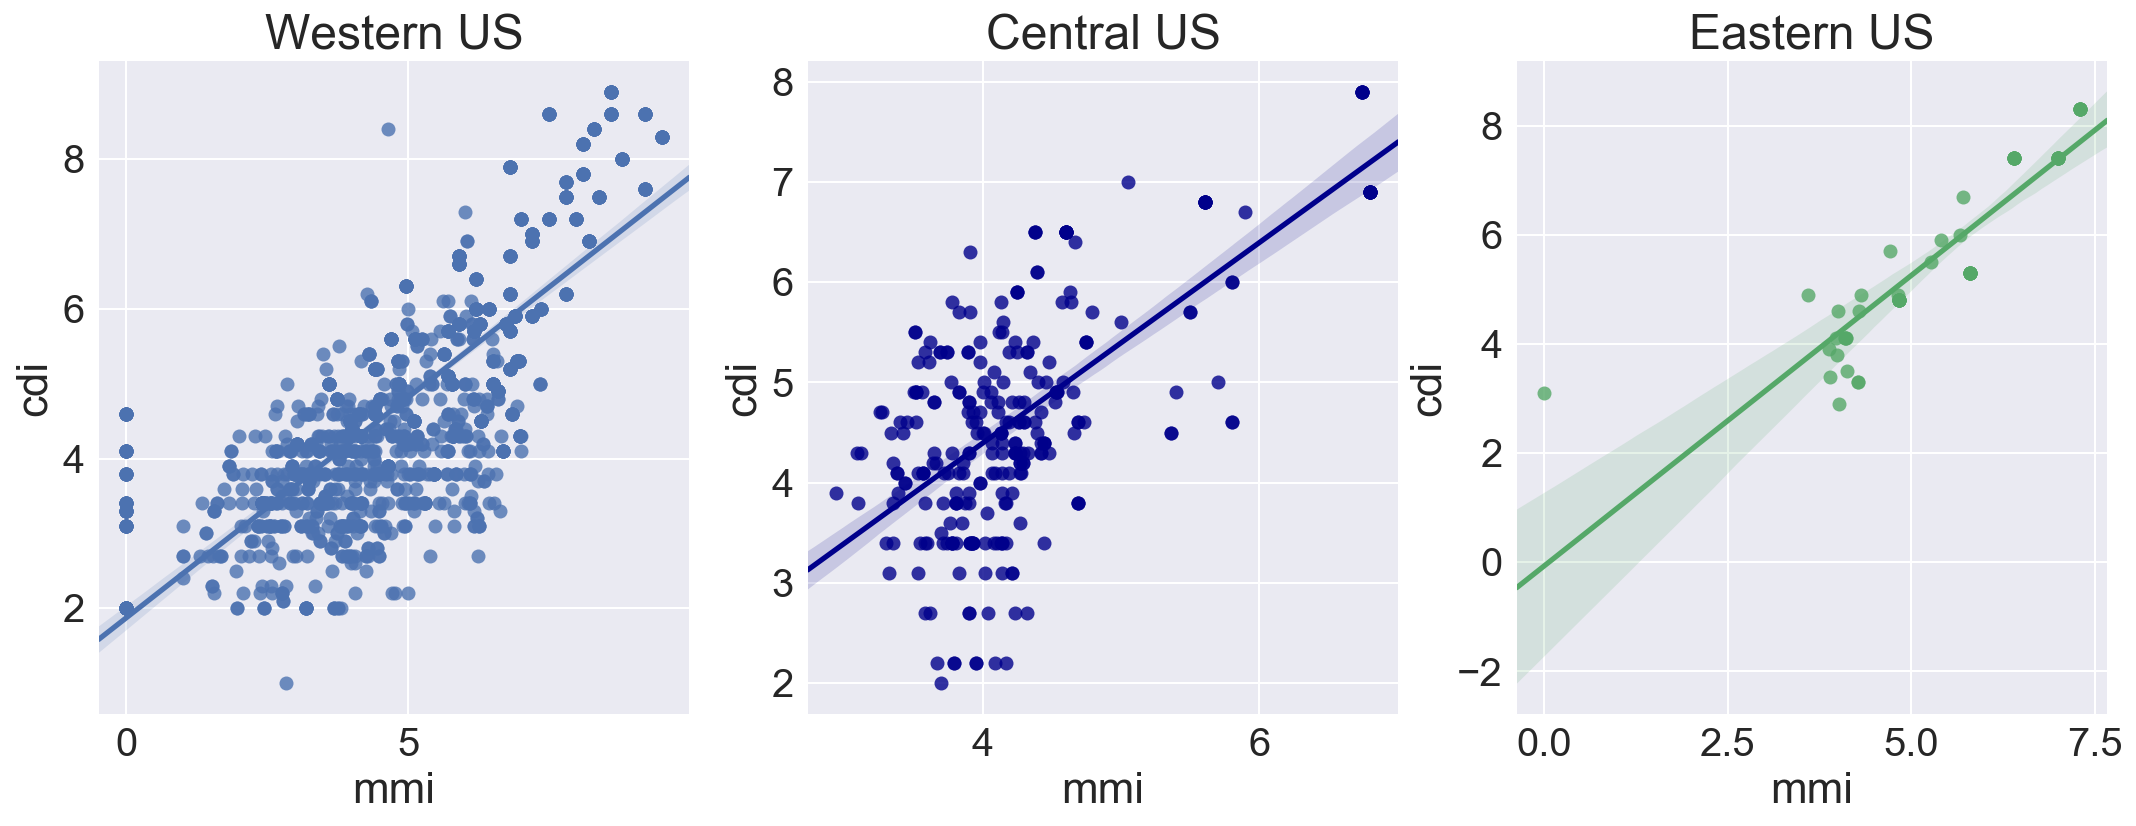

In [37]:
# Plot correlation of mmi and cdi for quakes in Western, Central and Eastern US
fig, axs = plt.subplots(ncols=3, figsize=(18,6))


sns.regplot('mmi', 'cdi', data=dfmw[(dfmw['felt']>=5) & (dfmw['Z_West']) ], ax=axs[0])

sns.regplot('mmi', 'cdi', data=dfmw[(dfmw['felt']>=5) & ~(dfmw['Z_West']) & ~(dfmw['Z_East']) ],\
              ax=axs[1], color='darkblue')

sns.regplot('mmi', 'cdi', data=dfmw[(dfmw['felt']>=5) & (dfmw['Z_East']) ], ax=axs[2])

axs[0].set_title('Western US')
axs[1].set_title('Central US')
axs[2].set_title('Eastern US')



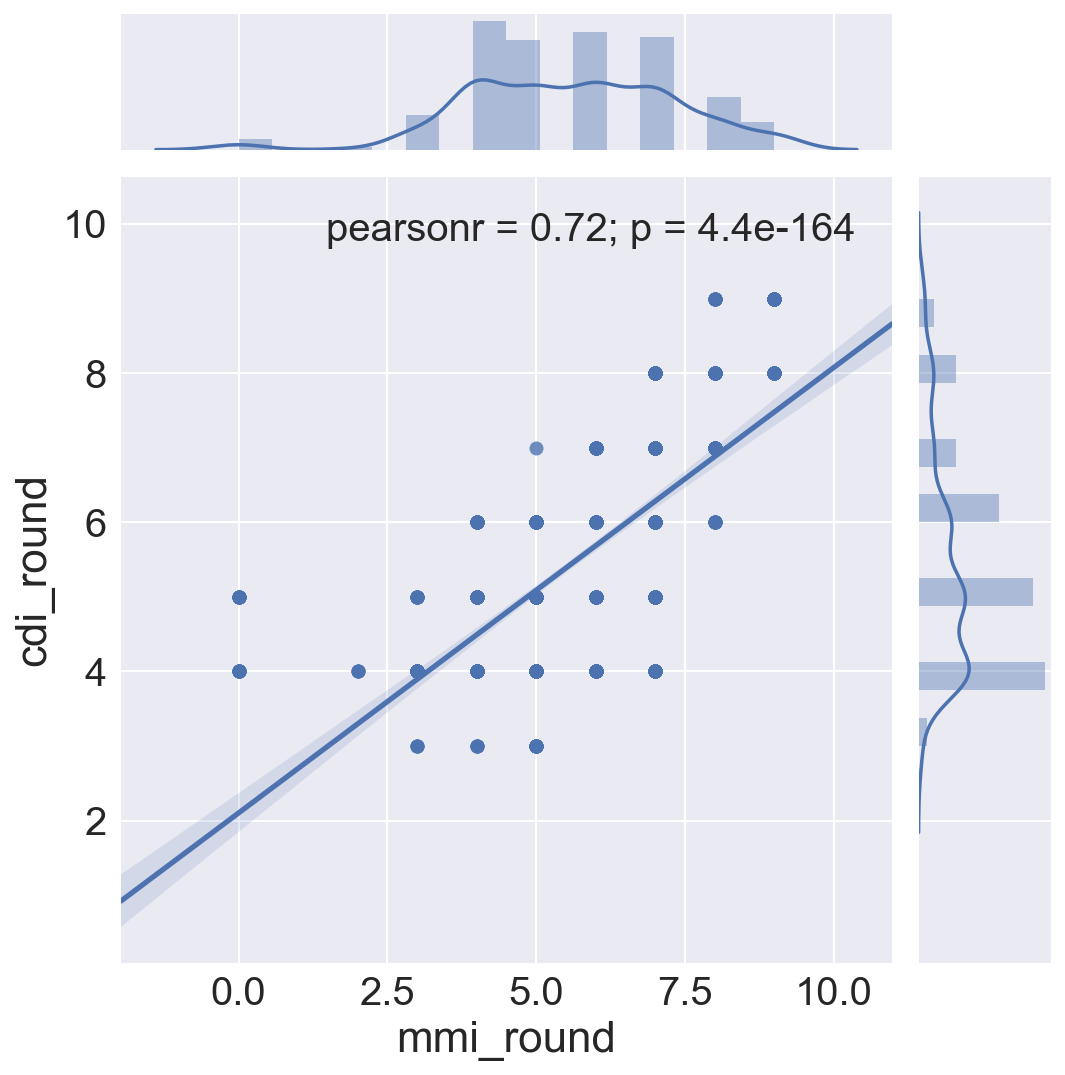

In [159]:
# Look at just the traditional integer intensity scales by rounding the decimal values.   
# The pearson correlation coefficient is not as good as it was when using decimal scale intensities above. 

sns.jointplot('mmi_round', 'cdi_round', data=dfmw[dfmw['felt']>100], kind = "reg", size=8)

## Build Classification Models

Predict MMI from crowd sourced CDI 

In [47]:
# Import the correct libraries for Logistic Regression, either SciKit Learn or StatsModel

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import statsmodels.api as sm

In [48]:
y = dfmw['mmi_round'].values
X = dfmw[['cdi', 'depth', 'felt', 'Z_East', 'Z_West']]

In [49]:
# MMI Baseline
dfmw['mmi_round'].value_counts(dropna=False)

4     610
3     297
6     279
5     268
7     203
8     100
2      91
0      78
9      59
1      14
10     10
Name: mmi_round, dtype: int64

In [50]:
# MMI Baseline continued
# 4 is the majority class
baseline = 610.0 / len(dfmw['mmi_round'])
baseline

0.30363364858138375

In [51]:
# Train/Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [52]:
# Standardize

# Standardize the data
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [53]:
# Logistic Regression instantiation.  Note that penalty and solver are set to the defaults.

# See http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for details

lr = LogisticRegression(penalty="l2", C=1, fit_intercept=True, solver="liblinear")


In [55]:
# Next step is to fit the model
lr.fit(Xs_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
# Diplay the model results and coefficients

# The score, intercept and coefficients 
print "Model Score:", lr.score(Xs_train, y_train)
print "Intercept:", lr.intercept_
print "Coefficients:", lr.coef_

# Also the classes
print "\nPrediction Classes:", lr.classes_


Model Score: 0.441678520626
Intercept: [-3.78441634 -5.00789581 -4.21944669 -2.72740246 -1.33983519 -2.0566945
 -2.00845545 -2.58298114 -4.81690592 -5.7102855  -5.55633448]
Coefficients: [[-0.80196238  0.42865825 -0.57450364  0.42043189  0.90706483]
 [-0.8201968   0.45597004 -0.04788437  0.03735832  0.28299678]
 [-0.93995825  0.82476654 -1.37656253  0.05034449  0.79806964]
 [-1.19043734  0.26084875 -1.81244418 -0.39579225  0.29624739]
 [-0.4342468  -0.19510137 -1.75393514 -0.15997517 -0.91137866]
 [ 0.1623507  -0.36479762 -0.57827393  0.19658047  0.10475485]
 [ 0.39593265 -0.29840571  0.04282382  0.41143661  0.67982473]
 [ 0.77213985 -0.62195631  0.34219614  0.15438065  0.59394102]
 [ 1.85873227  0.2940733   0.09452195 -0.35899627  0.79594101]
 [ 2.08951025 -0.03801013  0.32463608 -0.59026415  0.83532796]
 [ 1.35437154  0.4056007  -1.2139681  -0.02262615  0.0954446 ]]

Prediction Classes: [ 0  1  2  3  4  5  6  7  8  9 10]


In [57]:
# The defaul model accuracy  - Fits better with no regularization (C = 1e9)
print lr.score(Xs_test, y_test)

0.449419568823


In [58]:
# Get predicted values to plot against actuals
predicted = lr.predict(Xs_test)

# Save residuals for future modeling
lr_residuals = y_test - predicted

In [59]:
logreg_test = pd.DataFrame({'y_test' : y_test, 'predicted' : predicted, 'residuals' : lr_residuals})
logreg_test = logreg_test[['y_test', 'predicted', 'residuals']]
# logreg_test = logreg_test[['y', 'predicted']]

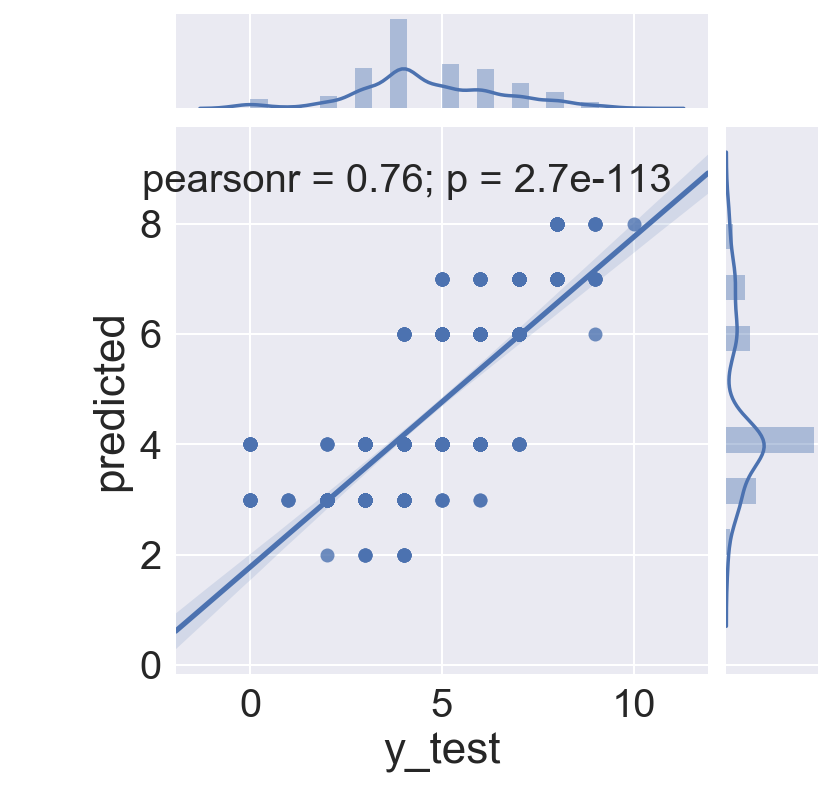

In [60]:
sns.jointplot(x='y_test', y='predicted', data=logreg_test, kind="reg")

In [61]:
logreg_test.head()

,y_test,predicted,residuals
0,6,4,2
1,3,4,-1
2,4,4,0
3,4,4,0
4,4,4,0


## Run group of classifiers to find best performing model

In [63]:
# Run lots of classifiers on this and see which perform the best
# Import all the modeling libraries

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, \
                                    KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt


Model:  Features    Train Set Accuracy    CrossVal Accuracy     Test Set Accuracy   
LR        5         0.442               0.433 +/- 0.008         0.449 
LDA       5         0.464               0.437 +/- 0.016         0.454 
QDA       5         0.006               0.007 +/- 0.003         0.002 
KNN       5         0.787               0.649 +/- 0.005         0.660 
CART      5         0.996               0.740 +/- 0.003         0.766 


/Users/erhepp/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/erhepp/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/erhepp/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:719: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/erhepp/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:719: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/erhepp/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:722: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


RFST      5         0.984               0.752 +/- 0.007         0.789 
GB        5         0.904               0.736 +/- 0.003         0.756 
ADA       5         0.361               0.363 +/- 0.005         0.367 
SVM       5         0.514               0.498 +/- 0.020         0.488 
GNB       5         0.156               0.146 +/- 0.013         0.136 
    MNB  :   failed on this input dataset 
BNB       5         0.381               0.365 +/- 0.006         0.388 



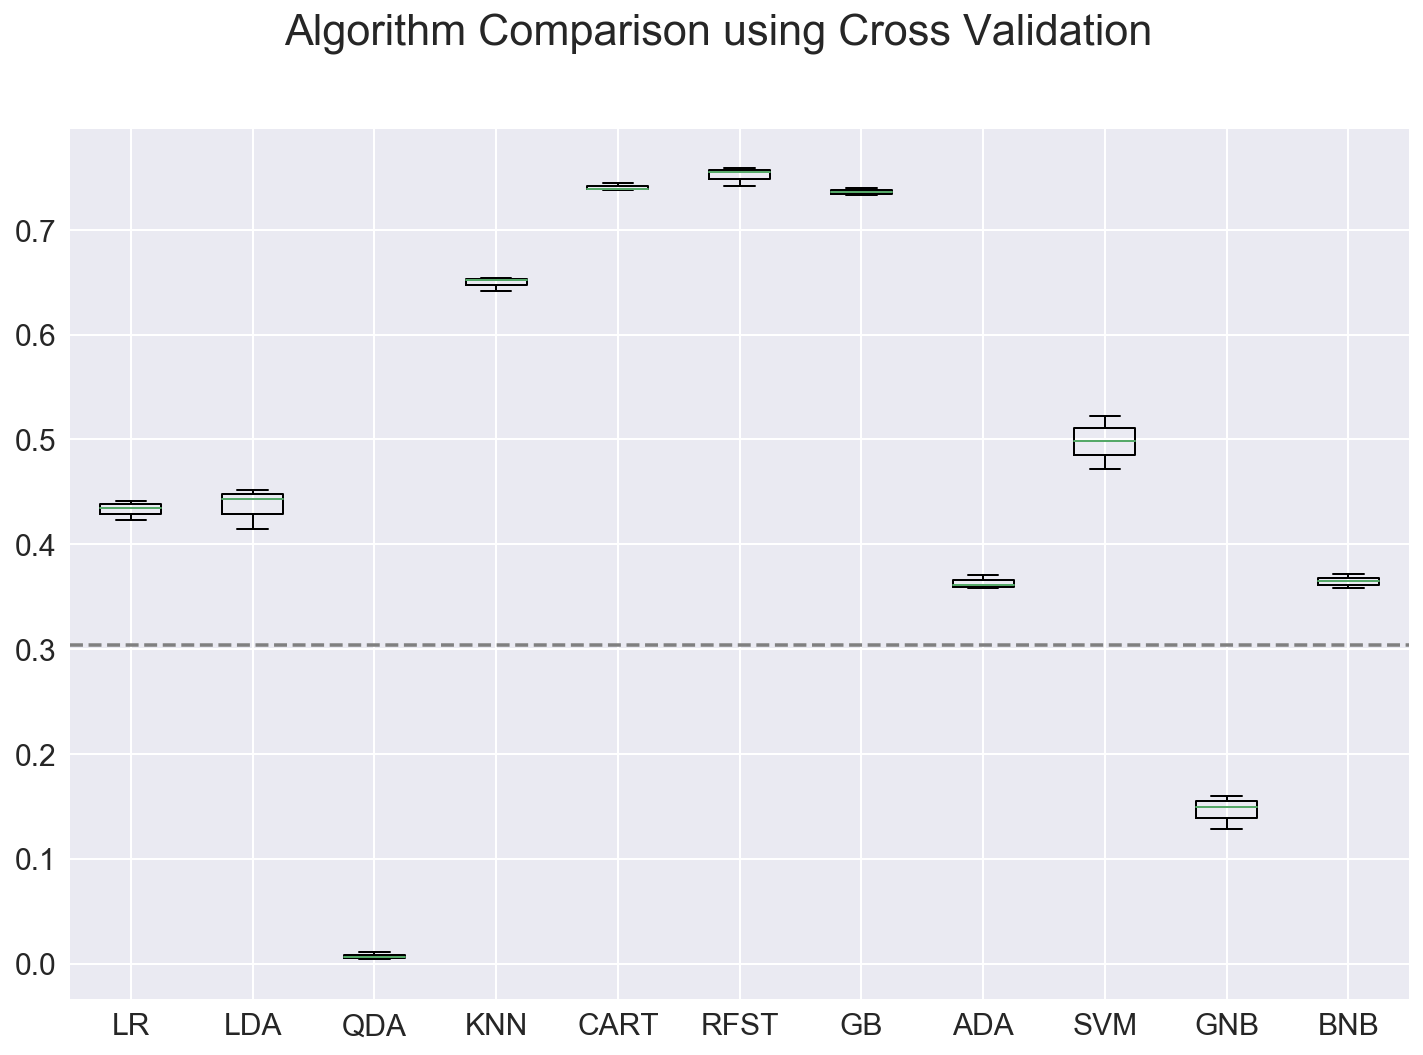

In [64]:
# prepare configuration for cross validation test harness
seed = 42

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFST', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('SVM', SVC()))
models.append(('GNB', GaussianNB()))
models.append(('MNB', MultinomialNB()))
models.append(('BNB', BernoulliNB()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

# print "\n{}:   {:0.3} ".format('Baseline', baseline, cv_results.std())
print "\n{:5.5}:  {:10.8}  {:20.18}  {:20.17}  {:20.17}".format\
        ("Model", "Features", "Train Set Accuracy", "CrossVal Accuracy", "Test Set Accuracy")

for name, model in models:
    try:
        kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, Xs_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        this_model = model
        this_model.fit(Xs_train,y_train)
        print "{:5.5}     {:}         {:0.3f}               {:0.3f} +/- {:0.3f}         {:0.3f} ".format\
                (name, Xs_train.shape[1], metrics.accuracy_score(y_train, this_model.predict(Xs_train)), \
                 cv_results.mean(), cv_results.std(), metrics.accuracy_score(y_test, this_model.predict(Xs_test)))
    except:
        print "    {:5.5}:   {} ".format(name, 'failed on this input dataset')

        
                
# boxplot algorithm comparison

# Set colors, as this shows up better on the grey back ground
# need to figure out how to set these colors for matplotlib boxplot
# from this color=color param that works for pandas boxplots
color = dict(boxes='DarkGreen', whiskers='DarkOrange', \
                medians='DarkBlue', caps='Gray')

print
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison using Cross Validation')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.axhline(y=baseline, color='grey', linestyle='--')
plt.show()

In [190]:
### Run a Decision Tree to produce an example visualization 
from sklearn.tree import DecisionTreeRegressor

dtrN = DecisionTreeRegressor(max_depth=3)
dtrN.fit(X_train, y_train)
dtrN_scores = cross_val_score(dtrN, X_train, y_train, cv=4)

print dtrN_scores, np.mean(dtrN_scores)

[ 0.55846633  0.68115003  0.60999124  0.68639605] 0.634000911174


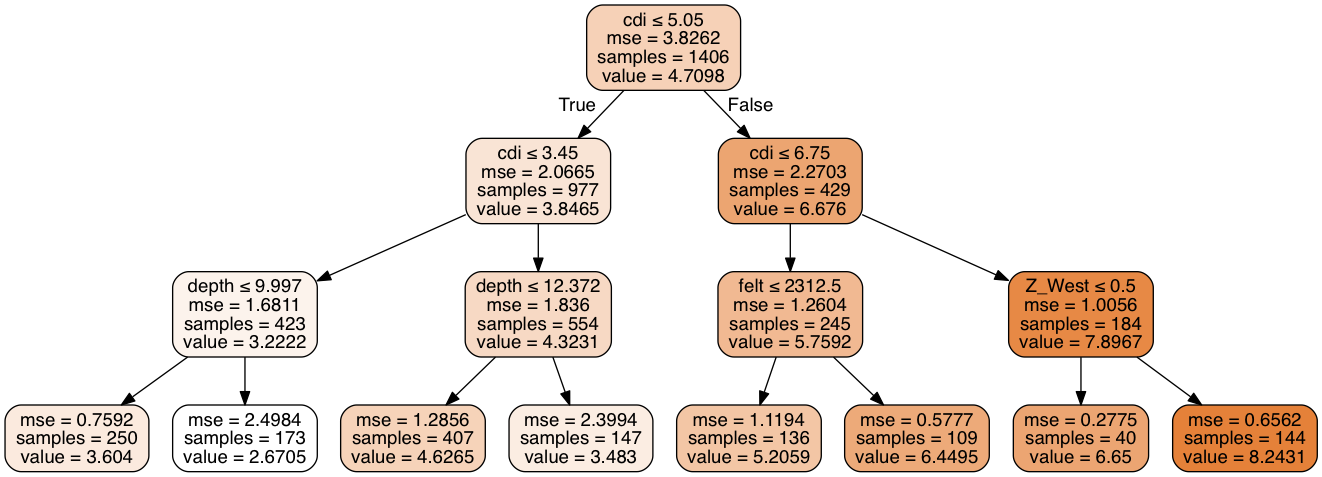

In [191]:
# feature_names = X.columns

# TEMPLATE CODE
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtrN, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [66]:
# Re-run the Random Forrest model and use to predict MMI
# Save residuals for future model using additional factors

print "Random Forest Classifier using factors:", list(X_train.columns)

rf = RandomForestClassifier()
rf.fit(Xs_train,y_train)

print "{:14.14}     {:}         {:0.3f}               {:0.3f} +/- {:0.3f}         {:0.3f} ".format\
                ('Random Forest', Xs_train.shape[1], metrics.accuracy_score(y_train, rf.predict(Xs_train)), \
                 cv_results.mean(), cv_results.std(), metrics.accuracy_score(y_test, rf.predict(Xs_test)))
        

Random Forest Classifier using factors: ['cdi', 'depth', 'felt', 'Z_East', 'Z_West']
Random Forest      5         0.990               0.365 +/- 0.006         0.794 


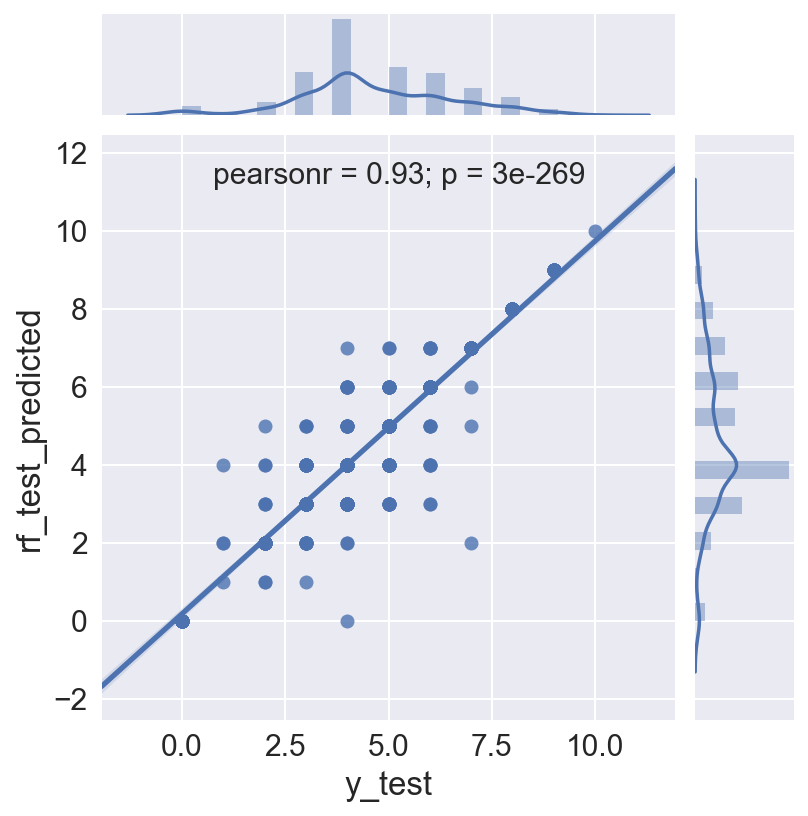

In [67]:
rf_test_predicted = rf.predict(Xs_test)
rf_train_predicted = rf.predict(Xs_train)
rf_test_residuals = y_test - rf_test_predicted
rf_train_residuals = y_train - rf_train_predicted

rf_test = pd.DataFrame({'y_test':y_test, 'rf_test_predicted':rf_test_predicted, 'rf_test_residuals':rf_test_residuals})
rf_train = pd.DataFrame({'y_train':y_train, 'rf_train_predicted':rf_train_predicted, \
                        'rf_train_residuals':rf_train_residuals})

rf_test = rf_test[['y_test', 'rf_test_predicted', 'rf_test_residuals']]
rf_train = rf_train[['y_train', 'rf_train_predicted', 'rf_train_residuals']]

sns.set(font_scale=1.5)
sns.jointplot(x='y_test', y='rf_test_predicted', data=rf_test, kind="reg")

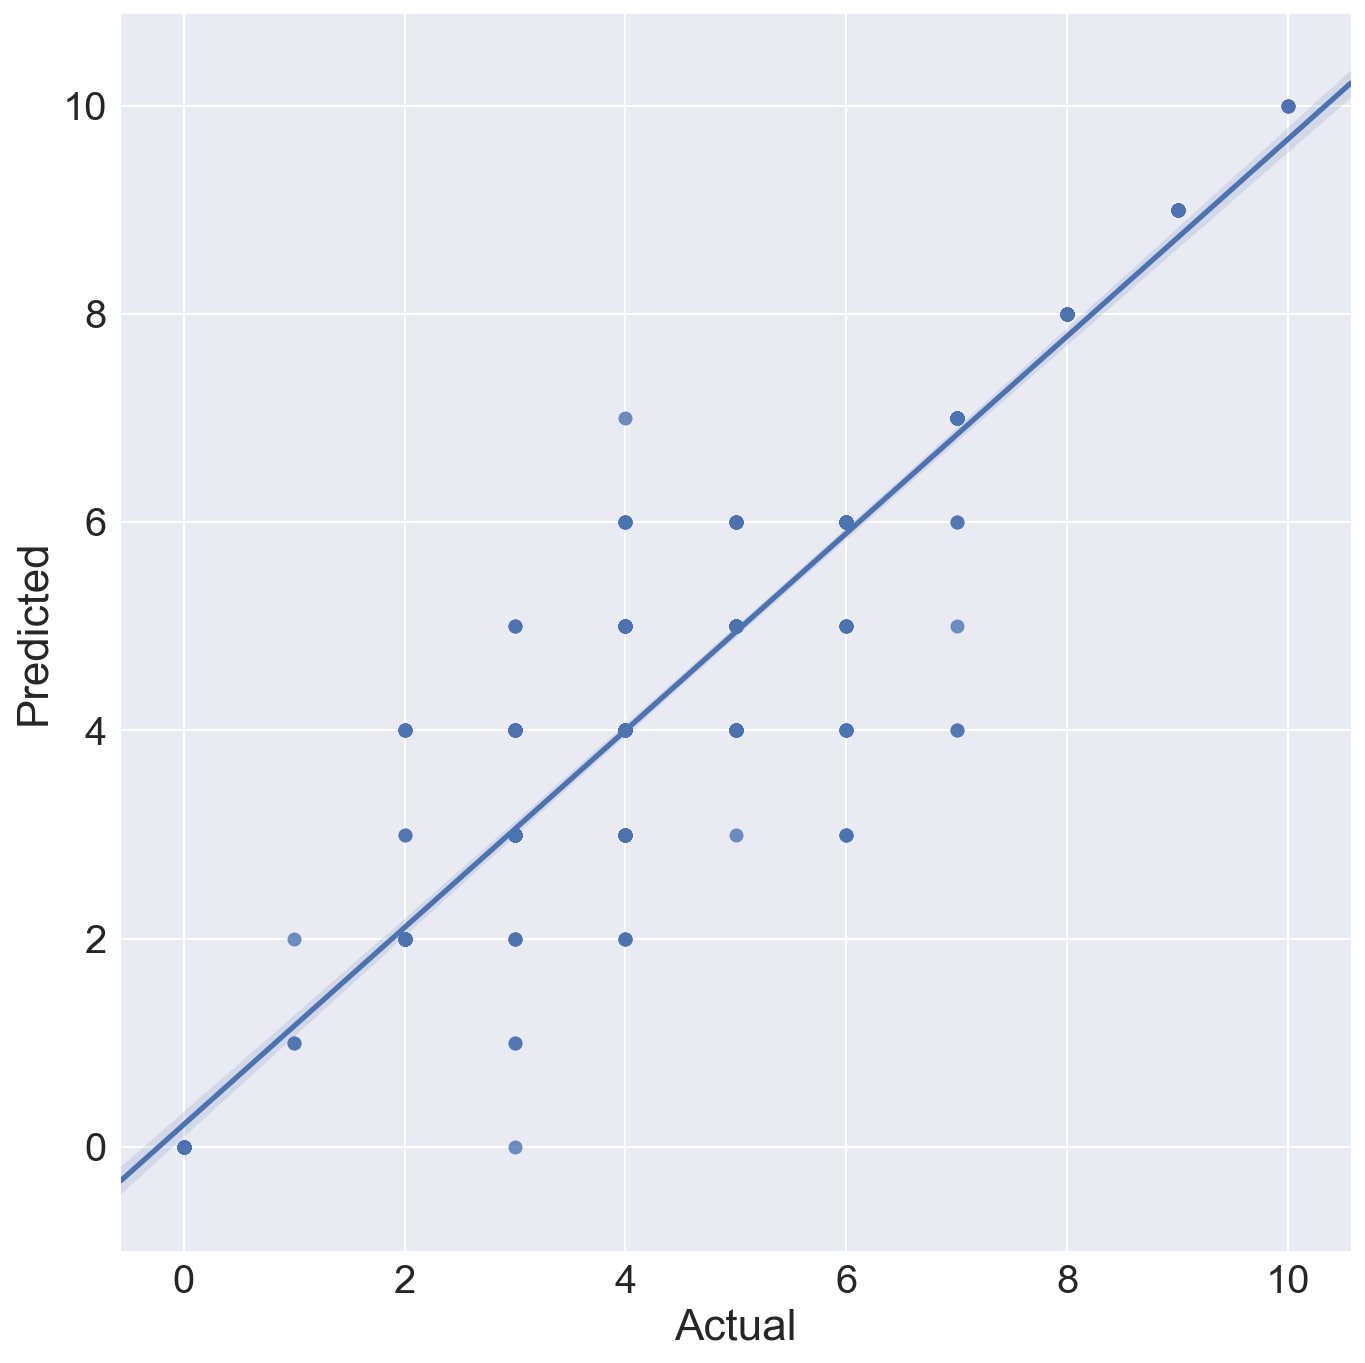

In [343]:
sns.set(font_scale=2)
rf_test_rename = rf_test.copy()
rf_test_rename.columns = ['Actual', 'Predicted', 'Residual']
sns.lmplot(x='Actual', y='Predicted', data=rf_test_rename, size=10, aspect=1)

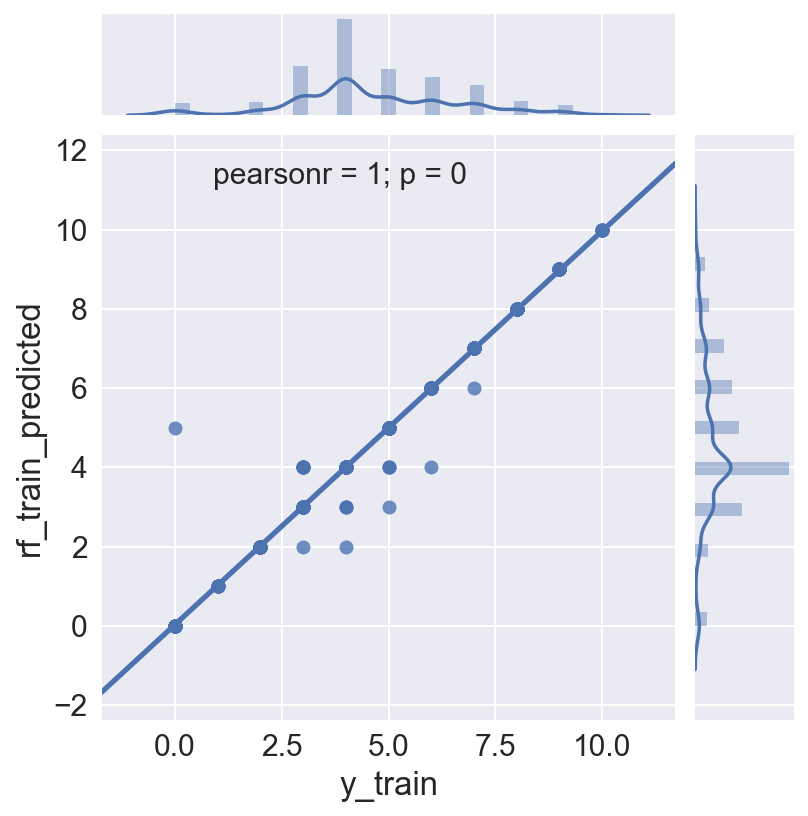

In [301]:
sns.jointplot(x='y_train', y='rf_train_predicted', data=rf_train, kind="reg")

In [68]:
# Gridsearch on Random Forest to find best depth
from sklearn.model_selection import GridSearchCV

# Gridsearch for best C and penalty
rfgs_params = {
    'n_estimators':[10,30,50],
    'criterion':['gini', 'entropy'],
    'max_depth':[4, 7, 12,None]
    }

# Define the GridSearch with CrossValidation and fit the model
rf_gridsearch = GridSearchCV(RandomForestClassifier(), rfgs_params, cv=3, verbose=1, n_jobs=-1)
rf_gridsearch.fit(Xs_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 30, 50], 'criterion': ['gini', 'entropy'], 'max_depth': [4, 7, 12, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [69]:
# best score on the training data:
rf_gridsearch.best_score_

0.77880512091038412

In [70]:
# best parameters on the training data:
rf_gridsearch.best_params_

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 30}

In [71]:
# assign the best estimator to a variable:
best_rf = rf_gridsearch.best_estimator_

In [72]:
# Score it on the testing data:
best_rf.score(Xs_test, y_test)

0.80597014925373134

In [73]:
# predict on the test data
rf_predicted = best_rf.predict(Xs_test)
rf_residuals = y_test - rf_predicted

In [74]:
# predict on test (for results) and train (for residuals for future model) data
gsrf_test_predicted = rf.predict(Xs_test)
gsrf_train_predicted = rf.predict(Xs_train)
gsrf_test_residuals = y_test - gsrf_test_predicted
gsrf_train_residuals = y_train - gsrf_train_predicted


gsrf_test_results = pd.DataFrame({'y_test':y_test, 'rf_predicted':gsrf_test_predicted, 'rf_residuals':gsrf_test_residuals})
gsrf_train_res = pd.DataFrame({'y_train':y_train, 'gsrf_train_predicted':rf_train_predicted, \
                        'rf_train_residuals':gsrf_train_residuals})


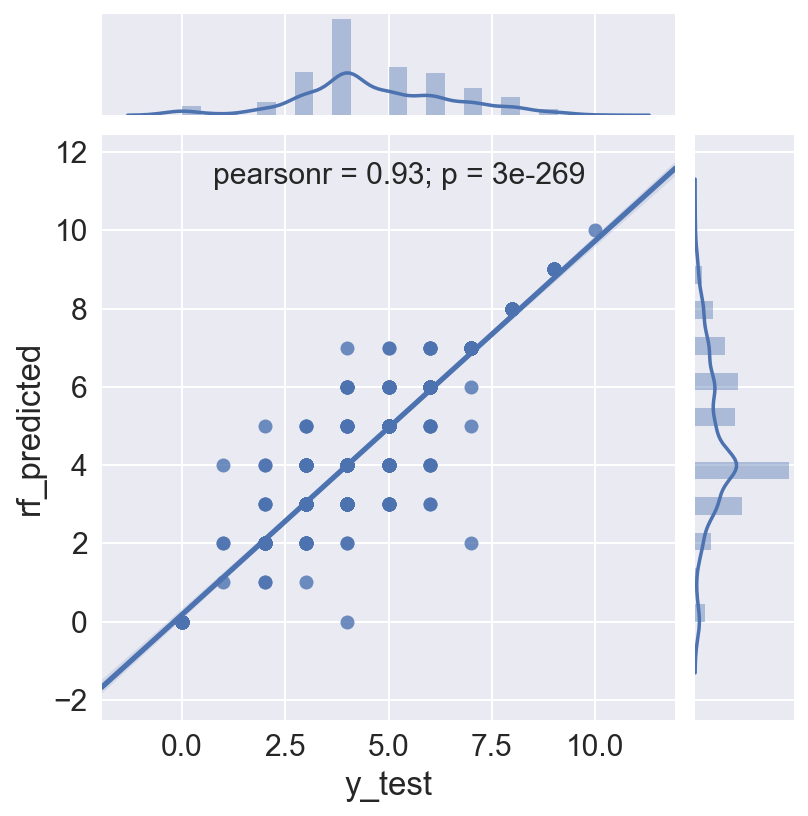

In [75]:
sns.jointplot(x='y_test', y='rf_predicted', data=gsrf_test_results, kind="reg")

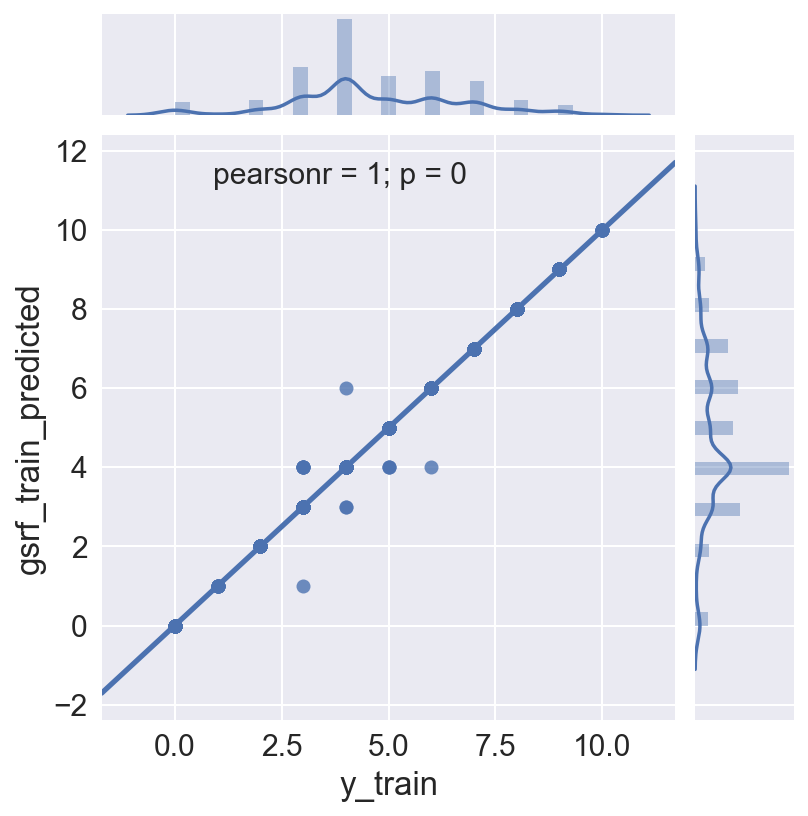

In [76]:
sns.jointplot(x='y_train', y='gsrf_train_predicted', data=gsrf_train_res, kind="reg")

In [77]:
# Seems there isn't much residual on the training set left to fit! 
print gsrf_train_res['rf_train_residuals'].abs().sum()
print len(gsrf_train_res['rf_train_residuals'])

17
1406


##  Include additional Features 

 - Crustal Features (Depth to Moho, Densities of crustal layers)
 - Reporting Station (net)
 - Magnitude Calculation Type (type)
 - Largest Azimuthal Gap (gap)
 - Number of stations reporting P and S arrival times (nst)
 - Earthquake Time of Day
 - Number of DYFI reports (felt)

In [113]:
dfmw.head()

,alert,cdi,depth,felt,gap,id,lat,long,mag,magDecade,...,N_se,N_uu,N_uw,crust_thickness,sed_density1,sed_density2,sed_density3,cryst_crust1_density,cryst_crust2_density,cryst_crust3_density
0,0.0,8.9,8.950,1141.0,123.4,ci3347678,34.416000,-118.370000,6.6,6.0,...,0,0,0,29.37,2.28,0.0,2.79,2.86,2.95,3.30
1,0.0,8.3,15.000,75.0,168.0,ci3352060,32.667333,-115.359167,6.4,6.0,...,0,0,0,25.44,2.28,0.0,2.74,2.78,2.86,3.32
2,0.0,8.4,9.578,73.0,137.0,nc1091100,36.231667,-120.312000,6.7,6.0,...,0,0,0,25.91,2.28,0.0,2.79,2.86,2.95,3.29
3,0.0,6.8,17.214,2.0,89.0,nc216859,37.036167,-121.879833,6.9,6.0,...,0,0,0,25.30,2.28,0.0,2.79,2.86,2.95,3.30
4,0.0,8.6,8.881,859.0,44.4,ci731691,34.061000,-118.079000,5.9,5.0,...,0,0,0,29.37,2.28,0.0,2.79,2.86,2.95,3.30


In [153]:
def get_hour(timestr):
    timesplit = timestr.split()[1]
    hourstr = timesplit.split(":")[0]
    return hourstr

dfmw['tod_hour'] = dfmw['time'].map(lambda x: x.split()[1].split(":")[0])



In [154]:
# Dummy the hour of quake occurrence - for example, are dyfi reports different if quakes happen in night hours
dfmw = pd.get_dummies(dfmw, columns=['tod_hour'], prefix='H', prefix_sep='_')
dfmw = dfmw.drop('H_23', 1)


In [79]:
# Dummy the seismographic network
dfmw = pd.get_dummies(dfmw, columns=['net'], prefix='N', prefix_sep='_')
dfmw = dfmw.drop('N_us', 1)


In [155]:
dfmw.head()

,alert,cdi,depth,felt,gap,id,lat,long,mag,magDecade,...,H_13,H_14,H_15,H_16,H_17,H_18,H_19,H_20,H_21,H_22
0,0.0,8.9,8.950,1141.0,123.4,ci3347678,34.416000,-118.370000,6.6,6.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,8.3,15.000,75.0,168.0,ci3352060,32.667333,-115.359167,6.4,6.0,...,0,0,0,0,0,0,1,0,0,0
2,0.0,8.4,9.578,73.0,137.0,nc1091100,36.231667,-120.312000,6.7,6.0,...,0,0,0,0,0,0,1,0,0,0
3,0.0,6.8,17.214,2.0,89.0,nc216859,37.036167,-121.879833,6.9,6.0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,8.6,8.881,859.0,44.4,ci731691,34.061000,-118.079000,5.9,5.0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# Add crustal thickness and density data from CRUST1.0
# Laske, G., Masters., G., Ma, Z. and Pasyanos, M., Update on CRUST1.0 - A 1-degree Global Model of Earth's Crust, 
# Geophys. Res. Abstracts, 15, Abstract EGU2013-2658, 2013.

rho = pd.read_csv('/Users/erhepp/fortran/crust1.0/crust1.rho', delim_whitespace=True, header=None, \
                 names=['top_water', 'bottom_water', 'bottom_ice', 'bottom_sed1', 'bottom_sed2', 'bottom_sed3', \
                       'bottom_crust1', 'bottom_crust2', 'bottom_crust3'])

bnds = pd.read_csv('/Users/erhepp/fortran/crust1.0/crust1.bnds', delim_whitespace=True, header=None, \
                 names=['top_water', 'bottom_water', 'bottom_ice', 'bottom_sed1', 'bottom_sed2', 'bottom_sed3', \
                       'bottom_crust1', 'bottom_crust2', 'bottom_crust3'])

print rho.shape, bnds.shape

def get_crust (qlat, qlong, crust_param):
# Return crustal density and thickness data for a given latitude / longitude
# When called with crust_param = 'rho'  returns lat, long and 9 values, 0-2 are surface water and ice, 
#    3-5 are sedimentary layer densities, and 6-8 are crystalline crust densities 
# When called with crust_param = 'bnds' the last value in list depth to the Mohorovičić discontinuity,
#    the boundary between the Earth's crust and mantle.


    # Prevent any float representation uncertainty from pushing latitude and longitude out of range
    if qlat >= 89.999: qlat = 89.999
    if qlat <= -89.999: qlat = -89.999
    if qlong >= 179.999: qlong = 179.999    
    if qlong <= -179.999: qlong = -179.999 
    
    # Find the closest crust1.0 grid locatio to the requested latitude and longitude
    if qlat >= 0:
        rlat = round(qlat - 0.5) + 0.5
    else:
        rlat = round(qlat + 0.5) - 0.5
   
    if qlong >= 0:
        rlong = round(qlong - 0.5) + 0.5
    else:
        rlong = round(qlong + 0.5) - 0.5

    # Determine the index in the crust1.0 files that corresponds to the closest grid location  
    # Information from the crust1.0 readme file
    #   The model is defined from 89.5 to -89.5 deg latitude and -179.5 to 179.5 deg
    #   longitude. Longitudes are the inner loop, i.e. all longitudes are stored
    #   for each latitude, then the next latitude is given. The model starts at
    #   89.5 N and 179.5 W.
    
    dist_from_north = 89.5 - rlat
    dist_from_west = 179.5 + rlong
    idx = int((dist_from_north)*360 + dist_from_west)
    
    # Calculate the latitude and longitude of the crust1.0 datapoint, and return the index loacation
    # latitude, longitude and, for each crustal layer, the density data.
    # Information from the crust1.0 readme file on order and meaning of values
    #    1) top of water
    #    2) bottom of water
    #    3) bottom of ice
    #    4) bottom of sediments 1
    #    5) bottom of sediments 2
    #    6) bottom of sediments 3
    #    7) bottom of cryst. crust 1
    #    8) bottom of cryst. crust 2
    #    9) bottom of cryst. crust 3 = Moho (depth to Moho, not crustal thickness!)

    # For this project, we will only use the density values for sediment and crystalline crust layers
    
    flat = 90 - dist_from_north-0.5
    flon = -180. + dist_from_west+0.5
    if crust_param == 'rho':
        return [idx, flat, flon, round(rho.iloc[idx,0],2), round(rho.iloc[idx,1],2), \
                                             round(rho.iloc[idx,2],2), round(rho.iloc[idx,3],2), \
                                             round(rho.iloc[idx,4],2), round(rho.iloc[idx,5],2), \
                                             round(rho.iloc[idx,6],2), round(rho.iloc[idx,7],2), \
                                             round(rho.iloc[idx,8],2)]
    if crust_param == 'bnds':
        return [idx, flat, flon, round(rho.iloc[idx,0],2), round(bnds.iloc[idx,1],2), \
                                             round(bnds.iloc[idx,2],2), round(bnds.iloc[idx,3],2), \
                                             round(bnds.iloc[idx,4],2), round(bnds.iloc[idx,5],2), \
                                             round(bnds.iloc[idx,6],2), round(bnds.iloc[idx,7],2), \
                                             round(bnds.iloc[idx,8],2)]



(64800, 9) (64800, 9)


In [83]:
dfmw.shape

(2009, 30)

In [86]:
for idx in range(len(dfmw)):
    dfmw.loc[idx, 'crust_thickness'] = np.abs(get_crust(dfmw.loc[idx, 'lat'], dfmw.loc[idx, 'long'], 'bnds')[-1])
    dfmw.loc[idx, 'sed_density1'] = get_crust(dfmw.loc[idx, 'lat'], dfmw.loc[idx, 'long'], 'rho')[6]
    dfmw.loc[idx, 'sed_density2'] = get_crust(dfmw.loc[idx, 'lat'], dfmw.loc[idx, 'long'], 'rho')[7]
    dfmw.loc[idx, 'sed_density3'] = get_crust(dfmw.loc[idx, 'lat'], dfmw.loc[idx, 'long'], 'rho')[8]
    dfmw.loc[idx, 'cryst_crust1_density'] = get_crust(dfmw.loc[idx, 'lat'], dfmw.loc[idx, 'long'], 'rho')[9]
    dfmw.loc[idx, 'cryst_crust2_density'] = get_crust(dfmw.loc[idx, 'lat'], dfmw.loc[idx, 'long'], 'rho')[10]
    dfmw.loc[idx, 'cryst_crust3_density'] = get_crust(dfmw.loc[idx, 'lat'], dfmw.loc[idx, 'long'], 'rho')[11]

print dfmw.shape
dfmw.head()
    


(2009, 37)


,alert,cdi,depth,felt,gap,id,lat,long,mag,magDecade,...,N_se,N_uu,N_uw,crust_thickness,sed_density1,sed_density2,sed_density3,cryst_crust1_density,cryst_crust2_density,cryst_crust3_density
0,0.0,8.9,8.950,1141.0,123.4,ci3347678,34.416000,-118.370000,6.6,6.0,...,0,0,0,29.37,2.28,0.0,2.79,2.86,2.95,3.30
1,0.0,8.3,15.000,75.0,168.0,ci3352060,32.667333,-115.359167,6.4,6.0,...,0,0,0,25.44,2.28,0.0,2.74,2.78,2.86,3.32
2,0.0,8.4,9.578,73.0,137.0,nc1091100,36.231667,-120.312000,6.7,6.0,...,0,0,0,25.91,2.28,0.0,2.79,2.86,2.95,3.29
3,0.0,6.8,17.214,2.0,89.0,nc216859,37.036167,-121.879833,6.9,6.0,...,0,0,0,25.30,2.28,0.0,2.79,2.86,2.95,3.30
4,0.0,8.6,8.881,859.0,44.4,ci731691,34.061000,-118.079000,5.9,5.0,...,0,0,0,29.37,2.28,0.0,2.79,2.86,2.95,3.30


In [163]:
factors = [x for x in dfmw.columns if x not in ['alert', 'id', 'lat', 'long', 'magDecade', 'time', 'year', 'color', \
                                                'mmi', 'mmi-cdi_difference', 'mmi_round', 'cdi_round', 'diff_rounded', \
                                                'type']]
print factors

ya = dfmw['mmi_round'].values
Xa = dfmw[factors]
# Modeled in prior model
# X = dfmw[['cdi', 'depth', 'felt', 'Z_East', 'Z_West']]

['cdi', 'depth', 'felt', 'gap', 'mag', 'Z_East', 'Z_West', 'N_ci', 'N_ld', 'N_mb', 'N_nc', 'N_nm', 'N_nn', 'N_se', 'N_uu', 'N_uw', 'crust_thickness', 'sed_density1', 'sed_density2', 'sed_density3', 'cryst_crust1_density', 'cryst_crust2_density', 'cryst_crust3_density', 'H_00', 'H_01', 'H_02', 'H_03', 'H_04', 'H_05', 'H_06', 'H_07', 'H_08', 'H_09', 'H_10', 'H_11', 'H_12', 'H_13', 'H_14', 'H_15', 'H_16', 'H_17', 'H_18', 'H_19', 'H_20', 'H_21', 'H_22']


In [164]:
Xa.head()

,cdi,depth,felt,gap,mag,Z_East,Z_West,N_ci,N_ld,N_mb,...,H_13,H_14,H_15,H_16,H_17,H_18,H_19,H_20,H_21,H_22
0,8.9,8.950,1141.0,123.4,6.6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.3,15.000,75.0,168.0,6.4,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,8.4,9.578,73.0,137.0,6.7,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,6.8,17.214,2.0,89.0,6.9,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,8.6,8.881,859.0,44.4,5.9,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
# Train/Test Split 
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.30, random_state=42)

In [167]:
# Standardize

# Standardize the data
ss = StandardScaler()
Xas_train = ss.fit_transform(Xa_train)
Xas_test = ss.transform(Xa_test)

In [168]:
# The first example uses SciKit Learn

# Logistic Regression instantiation.  Note that penalty and solver are set to the defaults.
# See http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for details

lr_all = LogisticRegression(penalty="l2", C=1, fit_intercept=True, solver="liblinear")


In [169]:
# fit the model
lr_all.fit(Xas_train, ya_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [170]:
# Review the results

# The score, intercept and coefficients 
print "Model Score:", lr_all.score(Xas_train, ya_train)
print "Intercept:", lr_all.intercept_
print "Coefficients:", lr_all.coef_

# Also the classes
print "\nPrediction Classes:", lr_all.classes_


Model Score: 0.71266002845
Intercept: [-5.78318232 -5.94342602 -5.82024081 -3.4646837  -1.43069525 -2.69310633
 -3.1470936  -4.66854501 -6.97082989 -6.52035277 -5.89022289]
Coefficients: [[ -1.80654113e-01   3.83075158e-01  -3.53701227e-01  -3.53699701e-01
    5.87433928e-01  -4.41608142e-02  -1.79433734e-02  -3.06816598e-01
    1.18751767e-01  -8.32503276e-02  -7.71041082e-01  -5.93320301e-02
   -1.73685339e-01   9.04353964e-02  -1.51287601e-02  -2.43367140e-01
   -2.45014632e-01   1.15126440e-01  -1.32625069e-01  -1.83946738e+00
   -9.09125485e-02  -9.02264135e-02  -1.20223977e-01  -4.05677826e-01
   -7.78639161e-01  -4.82842550e-01  -5.45728019e-01  -2.33989059e-01
   -2.93121624e-02  -4.46621831e-01  -5.67041418e-01  -2.02437610e-01
   -1.04363445e+00  -2.68167259e-01  -4.86441233e-01  -9.18246438e-01
   -5.84945444e-01  -3.38243784e-01  -1.76114356e-01  -1.45220253e-01
   -3.05473093e-01  -1.54286790e-01  -2.84679847e-01  -2.48652143e-01
   -3.31981301e-01  -1.02271979e+00]
 [ -7.

In [171]:
# The defaul model accuracy  - Fits better with no regularization (C = 1e9)
print lr_all.score(Xas_test, ya_test)

0.651741293532


In [172]:
# Get predicted values to plot against actuals
all_predicted = lr_all.predict(Xas_test)


In [173]:
logreg_test = pd.DataFrame({'ya_test' : ya_test, 'predicted' : all_predicted})
logreg_test = logreg_test[['ya_test', 'predicted']]

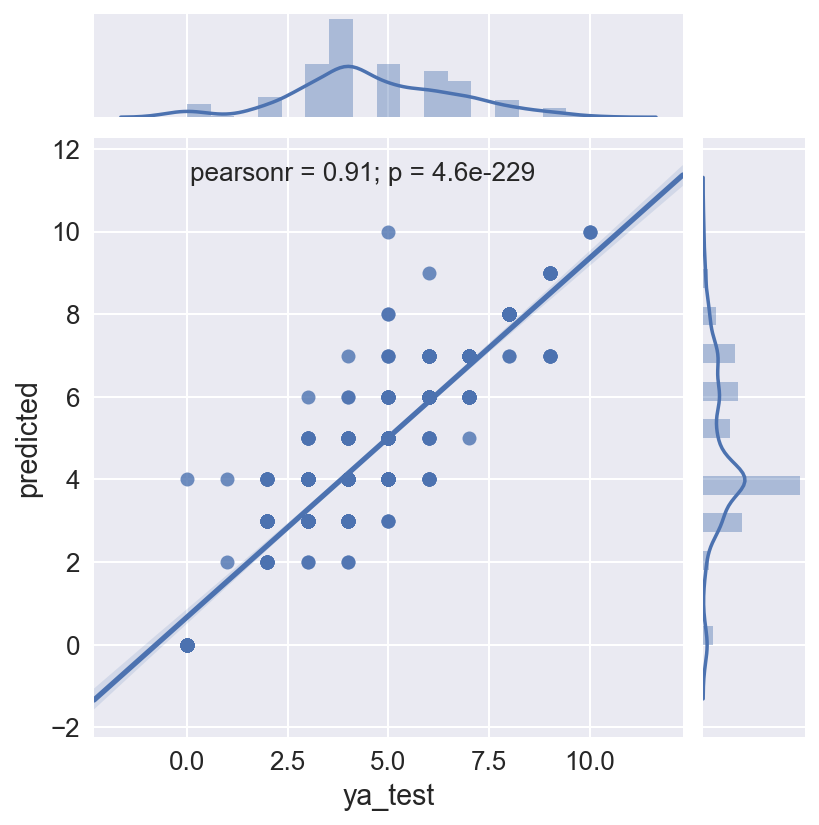

In [174]:
sns.jointplot(x='ya_test', y='predicted', data=logreg_test, kind="reg")

In [175]:
logreg_test.head()

,ya_test,predicted
0,4,4
1,4,4
2,6,4
3,5,6
4,4,4


### Set up for GridSearch and try again, determine if the model be further improved.

In [176]:
from sklearn.model_selection import GridSearchCV

# Gridsearch for best C and penalty
gs_params = {
    'penalty':['l1', 'l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,5,100)
}

# Define the GridSearch with CrossValidation and fit the model
lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=3, verbose=1, n_jobs=-1)
lr_gridsearch.fit(Xas_train, ya_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.26186e-05, ...,   7.92483e+04,   1.00000e+05]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [177]:
# best score on the training data:
lr_gridsearch.best_score_

0.67638691322901845

In [178]:
# best parameters on the training data:
lr_gridsearch.best_params_

{'C': 14.508287784959402, 'penalty': 'l1', 'solver': 'liblinear'}

In [179]:
# assign the best estimator to a variable:
best_lr = lr_gridsearch.best_estimator_

In [180]:
# Score it on the testing data:
best_lr.score(Xas_test, ya_test)

0.67495854063018246

In [191]:
# Get predicted values to plot against actuals
gsall_predicted = best_lr.predict(Xas_test)


In [193]:
gs_logreg_test = pd.DataFrame({'ya_test' : ya_test, 'predicted' : gsall_predicted})
gs_logreg_test = logreg_test[['ya_test', 'predicted']]

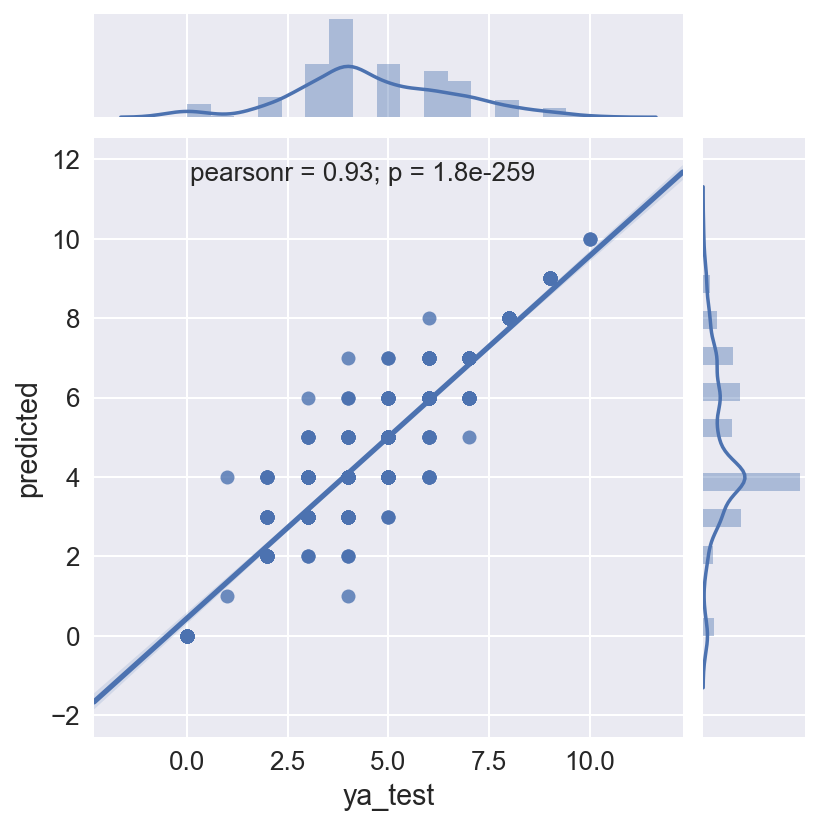

In [194]:
sns.jointplot(x='ya_test', y='predicted', data=gs_logreg_test, kind="reg")

In [195]:
print len(Xa.columns), len(best_lr.coef_[0]), len(np.round(np.exp(best_lr.coef_[0])*100-100,2))

46 46 46


In [196]:
coef_df = pd.DataFrame({
        'features': Xa.columns,
        'log odds': best_lr.coef_[0],
        'percentage change in odds': np.round(np.exp(best_lr.coef_[0])*100-100,2)
    })

In [197]:
coef_df.sort_values(by='percentage change in odds', ascending=0)

,features,log odds,percentage change in odds
4,mag,3.320124,2666.38
1,depth,1.441819,322.84
3,gap,0.639691,89.59
0,cdi,0.000000,0.00
28,H_05,0.000000,0.00
20,cryst_crust1_density,0.000000,0.00
21,cryst_crust2_density,0.000000,0.00
22,cryst_crust3_density,0.000000,0.00
27,H_04,0.000000,0.00
37,H_14,0.000000,0.00


In [198]:
# Create a subset of "coef_df" DataFrame with most important coefficients
imp_coefs = pd.concat([coef_df.sort_values(by='percentage change in odds', ascending=0).head(4),
                     coef_df.sort_values(by='percentage change in odds', ascending=0).tail(18)])

In [199]:
imp_coefs.set_index('features', inplace=True)
imp_coefs

,log odds,percentage change in odds
features,,
mag,3.320124,2666.38
depth,1.441819,322.84
gap,0.639691,89.59
cdi,0.000000,0.00
H_10,-0.060049,-5.83
H_19,-0.141052,-13.16
H_17,-0.351786,-29.66
N_uw,-0.511928,-40.07
H_03,-0.544275,-41.97


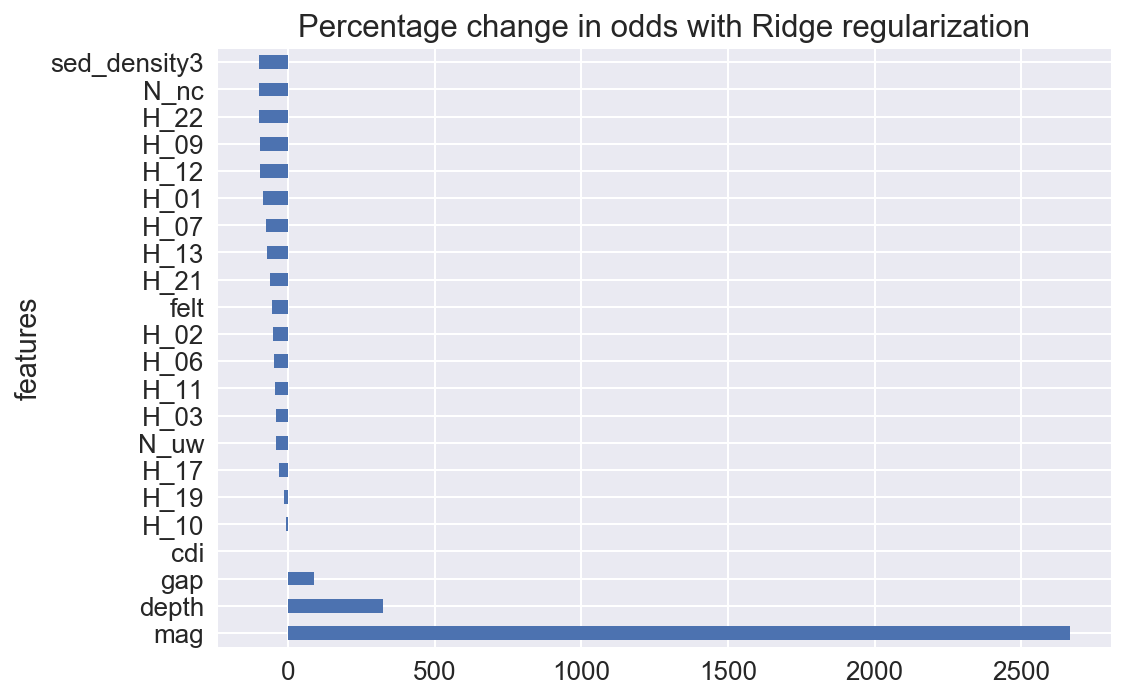

In [200]:
# Plot important coefficients
sns.set(font_scale=1.3)
imp_coefs['percentage change in odds'].plot(kind = "barh")
plt.title("Percentage change in odds with Ridge regularization")
plt.show()

In [201]:
# Get list of features and re-run model with just the 20 most important features
imp_features = imp_coefs.index

In [203]:
factors

['cdi',
 'depth',
 'felt',
 'gap',
 'mag',
 'Z_East',
 'Z_West',
 'N_ci',
 'N_ld',
 'N_mb',
 'N_nc',
 'N_nm',
 'N_nn',
 'N_se',
 'N_uu',
 'N_uw',
 'crust_thickness',
 'sed_density1',
 'sed_density2',
 'sed_density3',
 'cryst_crust1_density',
 'cryst_crust2_density',
 'cryst_crust3_density',
 'H_00',
 'H_01',
 'H_02',
 'H_03',
 'H_04',
 'H_05',
 'H_06',
 'H_07',
 'H_08',
 'H_09',
 'H_10',
 'H_11',
 'H_12',
 'H_13',
 'H_14',
 'H_15',
 'H_16',
 'H_17',
 'H_18',
 'H_19',
 'H_20',
 'H_21',
 'H_22']

In [204]:
# Set up X and y
Xi = dfmw[factors]
yi = dfmw['mmi_round'].values


In [205]:
# Test Train Split

Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.30)

In [206]:
# Standardize 
ss = StandardScaler()

Xis_train = ss.fit_transform(Xi_train)
Xis_test = ss.transform(Xi_test)# Test Train Split



Model:  Features    Train Set Accuracy    CrossVal Accuracy     Test Set Accuracy   
LR        46         0.700               0.622 +/- 0.012         0.629 
LDA       46         0.701               0.626 +/- 0.024         0.657 
    QDA  :   failed on this input dataset 
KNN       46         0.807               0.633 +/- 0.041         0.708 
CART      46         1.000               0.805 +/- 0.004         0.806 
RFST      46         0.993               0.817 +/- 0.017         0.841 
GB        46         0.974               0.819 +/- 0.021         0.854 
ADA       46         0.415               0.416 +/- 0.041         0.413 
SVM       46         0.829               0.707 +/- 0.025         0.733 
GNB       46         0.230               0.225 +/- 0.013         0.222 
    MNB  :   failed on this input dataset 
BNB       46         0.556               0.509 +/- 0.022         0.529 


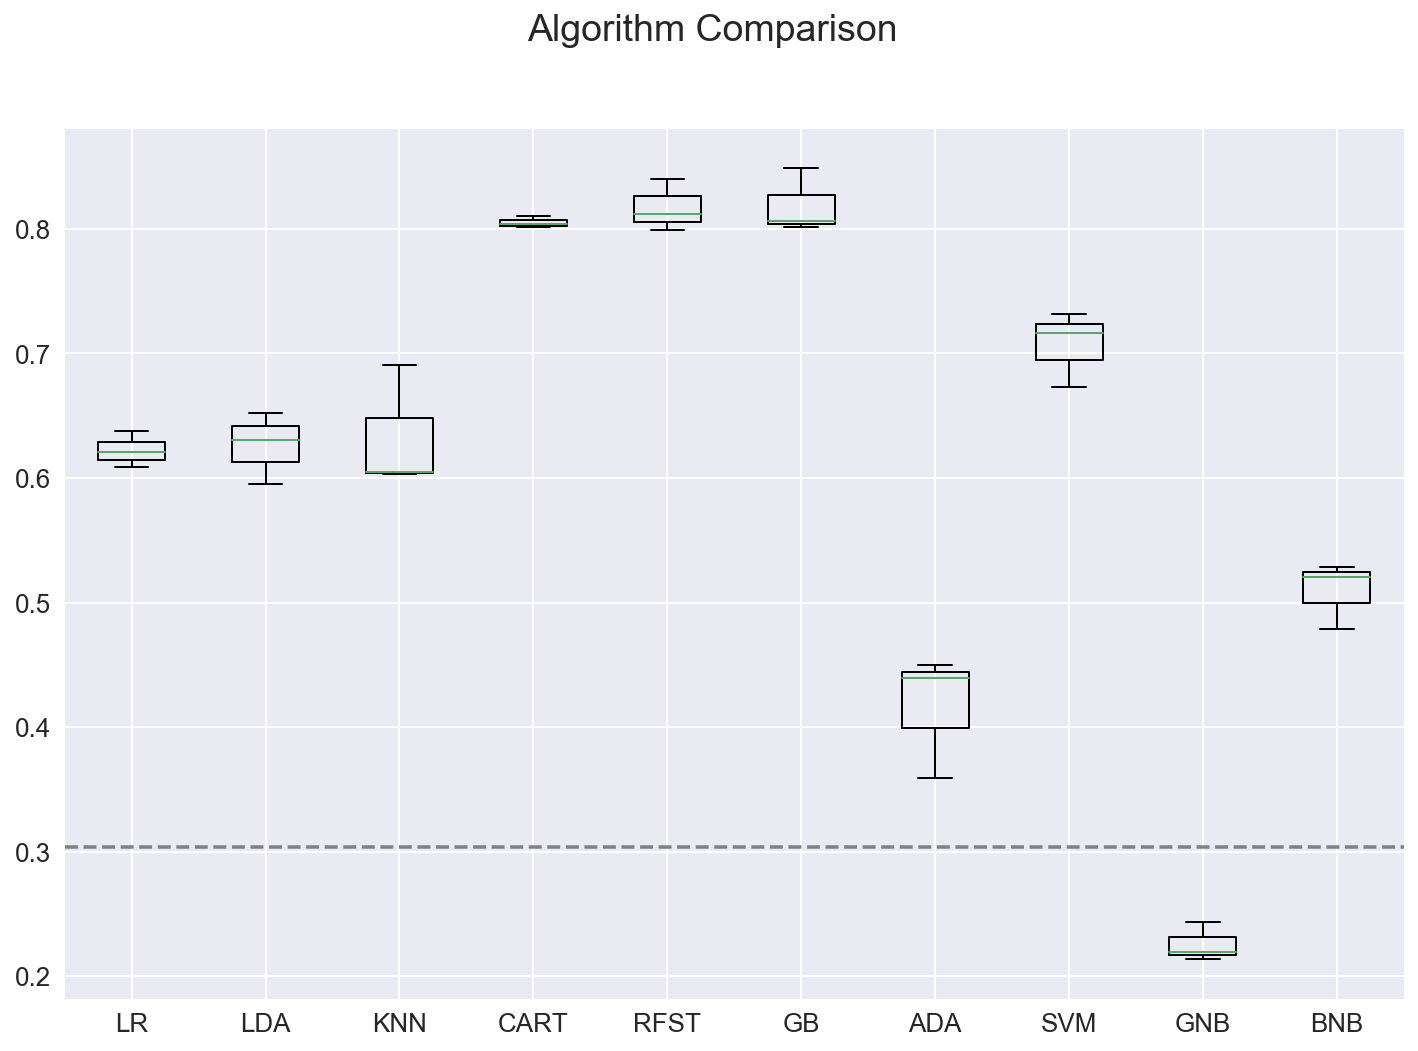

In [207]:
# prepare configuration for cross validation test harness
seed = 42

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFST', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('SVM', SVC()))
models.append(('GNB', GaussianNB()))
models.append(('MNB', MultinomialNB()))
models.append(('BNB', BernoulliNB()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

# print "\n{}:   {:0.3} ".format('Baseline', baseline, cv_results.std())
print "\n{:5.5}:  {:10.8}  {:20.18}  {:20.17}  {:20.17}".format\
        ("Model", "Features", "Train Set Accuracy", "CrossVal Accuracy", "Test Set Accuracy")

for name, model in models:
    try:
        kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, Xis_train, yi_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        this_model = model
        this_model.fit(Xis_train,yi_train)
        print "{:5.5}     {:}         {:0.3f}               {:0.3f} +/- {:0.3f}         {:0.3f} ".format\
                (name, Xis_train.shape[1], metrics.accuracy_score(yi_train, this_model.predict(Xis_train)), \
                 cv_results.mean(), cv_results.std(), metrics.accuracy_score(yi_test, this_model.predict(Xis_test)))
    except:
        print "    {:5.5}:   {} ".format(name, 'failed on this input dataset')

        
                
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.axhline(y=baseline, color='grey', linestyle='--')
plt.show()